In [18]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pickle

from scipy.stats import poisson

# Lab 5

In this lab we are working with more realistic data. It is still simulated data, but we will be choosing to be working with Large Hadron Collider (LHC) particle physics data.

We are going to work with a data that searches for the standard model Higgs boson in pp collisions at $\sqrt{s}$ = 13TeV QCD background contamination to find empirical evidence for the Higgs boson.

Our signal dataset is the higgs data, the background dataset labeled as qcd.

I will be working with the low range of transverse momenta, my partner the high range.

In [2]:
higgsData = pickle.load(open("higgs_100000_pt_250_500.pkl",'rb')) 
qcdData = pickle.load(open("qcd_100000_pt_250_500.pkl",'rb'))

In [3]:
print(higgsData.keys())
print(qcdData.keys())

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')
Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')


In [21]:
print(higgsData)

               pt       eta       phi        mass       ee2       ee3  \
0      472.074292  0.137052 -2.535145  125.150365  0.126581  0.002633   
1      470.405678 -0.039157  0.069669  130.552672  0.118071  0.002379   
2      438.008357 -0.181139 -3.031083  125.703063  0.167344  0.004623   
3      484.860421  0.251986  2.855706  126.215853  0.119238  0.002066   
4      486.141137 -1.917812 -2.221953  132.182504  0.103632  0.001438   
...           ...       ...       ...         ...       ...       ...   
99995  478.658254 -0.837586 -2.609921  125.707302  0.138041  0.001494   
99996  465.171259  0.429341 -1.446681  129.749906  0.135890  0.002071   
99997  466.920808 -0.805493 -0.754703   49.069161  0.020281  0.000121   
99998  471.611853  0.801813 -3.077883  117.186361  0.102276  0.002399   
99999  467.029906 -0.432315  2.483939   64.187269  0.031847  0.000260   

              d2  angularity        t1        t2        t3       t21  \
0       1.298020    0.008218  0.739787  0.283689  0

In [22]:
print(qcdData)

               pt       eta       phi        mass       ee2       ee3  \
0      489.631389  1.955969  1.803007  125.298720  0.099409  0.003247   
1      401.041884 -1.170413  0.188817   88.047054  0.101181  0.002527   
2      447.487556  1.861736 -2.326646   85.794174  0.069372  0.001375   
3      402.652836  1.276421 -1.124176   42.947328  0.032095  0.000266   
4      484.257672 -1.272225  1.966794   59.542227  0.038348  0.000358   
...           ...       ...       ...         ...       ...       ...   
99995  418.171225  1.804938 -1.555512   67.399102  0.047555  0.000669   
99996  492.119236 -0.037258  0.037888   90.775772  0.095329  0.001090   
99997  492.932552 -0.912632  0.578690  106.611253  0.078793  0.002331   
99998  402.673975 -1.736921 -2.103913   66.278542  0.066585  0.000851   
99999  454.801644  1.059727  1.462793   62.786390  0.062568  0.000652   

             d2  angularity        t1        t2        t3       t21       t32  \
0      3.304886    0.000528  0.846096  0.5

|             | Variable  | 
| ----------- | ----------- | 
| $p_t$     | transverse momentum    | 
| $\eta$   | psuedorapidity        |  
|$\phi$| azimuthal angle |
|$m$| invariant mass |
|$e_2$| 2-point ECF ratio |
|$e_3$| 3-point ECF ratio |
|$D_2$| 3 to 2 point ECF ratio |
|$\tau_{-2}$| angularity |
|$\tau_{1}$| $\tau_n$ refers to n-subjettiness |
|$\tau_{2}$| ...
|$\tau_{3}$| ...
|$\tau_{21}$| ratio of $\tau_2$ to $\tau_1$
|$\tau_{32}$| ratio of $\tau_3$ to $\tau_2$
|$K_{t}\Delta_R$| $\Delta_R$ of two subjets within large-R jet |


As a quick overview of the LHC, witnessing a Higgs boson is an extremely rare event. In fact, a lot of the designing of the apparatus had the intentions of finding empirical evidence of the Higgs boson. 

The LHC works by colliding bunches of protons (on the scale of $10^{11}$), in time intervals of nanoseconds.

We need to collide roughly 1 billion protons to produce a Higgs.
In a theoretical sense, this is fine, but how about detecting a Higgs with the tools at our disposal? We must consider the luminosity of the LHC. If we examine the $h \rightarrow \gamma\gamma$ decay mode, via dimensional analysis, we must collide 1 billion protons per second to experience 100 Higgs events in a year.

Most collisions are soft collisions involving gluons, but we are interested in those between heavier particles (between gluons, quarks, or antiquarks). This is where we get scattering in transverse directions relative to the direction of the beams, towards the detectors in the azimuthal direction.

In [4]:
def histAndLogHist(var, name, units):
    plt.rcParams["figure.figsize"] = (25, 25)  
    fig, ax = plt.subplots(2, 2)
    higgs_hist = ax[0, 0]
    higgs_log = ax[0, 1]
    qcd_hist = ax[1, 0]
    qcd_log = ax[1, 1]


    a = higgs_hist.hist(higgsData.get(var), density = True, bins = 100)
    higgs_hist.set_title(name + ' (Higgs)')
    higgs_hist.set_xlabel(name + units)
    higgs_hist.set_ylabel('frequency')

    b = higgs_log.hist(higgsData.get(var), density = True, bins = 100)
    higgs_log.set_title('Log of ' + name + ' (Higgs)')
    higgs_log.set_yscale('log')
    higgs_log.set_xlabel(name + units)
    higgs_log.set_ylabel('log(frequency)')

    c = qcd_hist.hist(qcdData.get(var), density = True, bins = 100, color = 'g')
    qcd_hist.set_title(name + ' (QCD)')
    qcd_hist.set_xlabel(name + units)
    qcd_hist.set_ylabel('frequency')

    d = qcd_log.hist(qcdData.get(var), density = True, bins = 100, color = 'g')
    qcd_log.set_title('Log of ' + name + ' (QCD)')
    qcd_log.set_yscale('log')
    qcd_log.set_xlabel(name + units)
    qcd_log.set_ylabel('log(frequency)')

    for plot in [higgs_hist, higgs_log, qcd_hist, qcd_log]:
        plot.title.set_fontsize(35)
        for item in ([plot.xaxis.label, plot.yaxis.label] + plot.get_xticklabels() + plot.get_yticklabels()):
            item.set_fontsize(25)

## Further explanation of important data:

### Transverse Momentum

We can measure the transverse momentum of particles by taking the scalar of the momentum in the x and y direction (which consists of the plane that is perpendicular to the direction of the beam).

Let's try plotting the transverse momentum from both sets in a histogram.

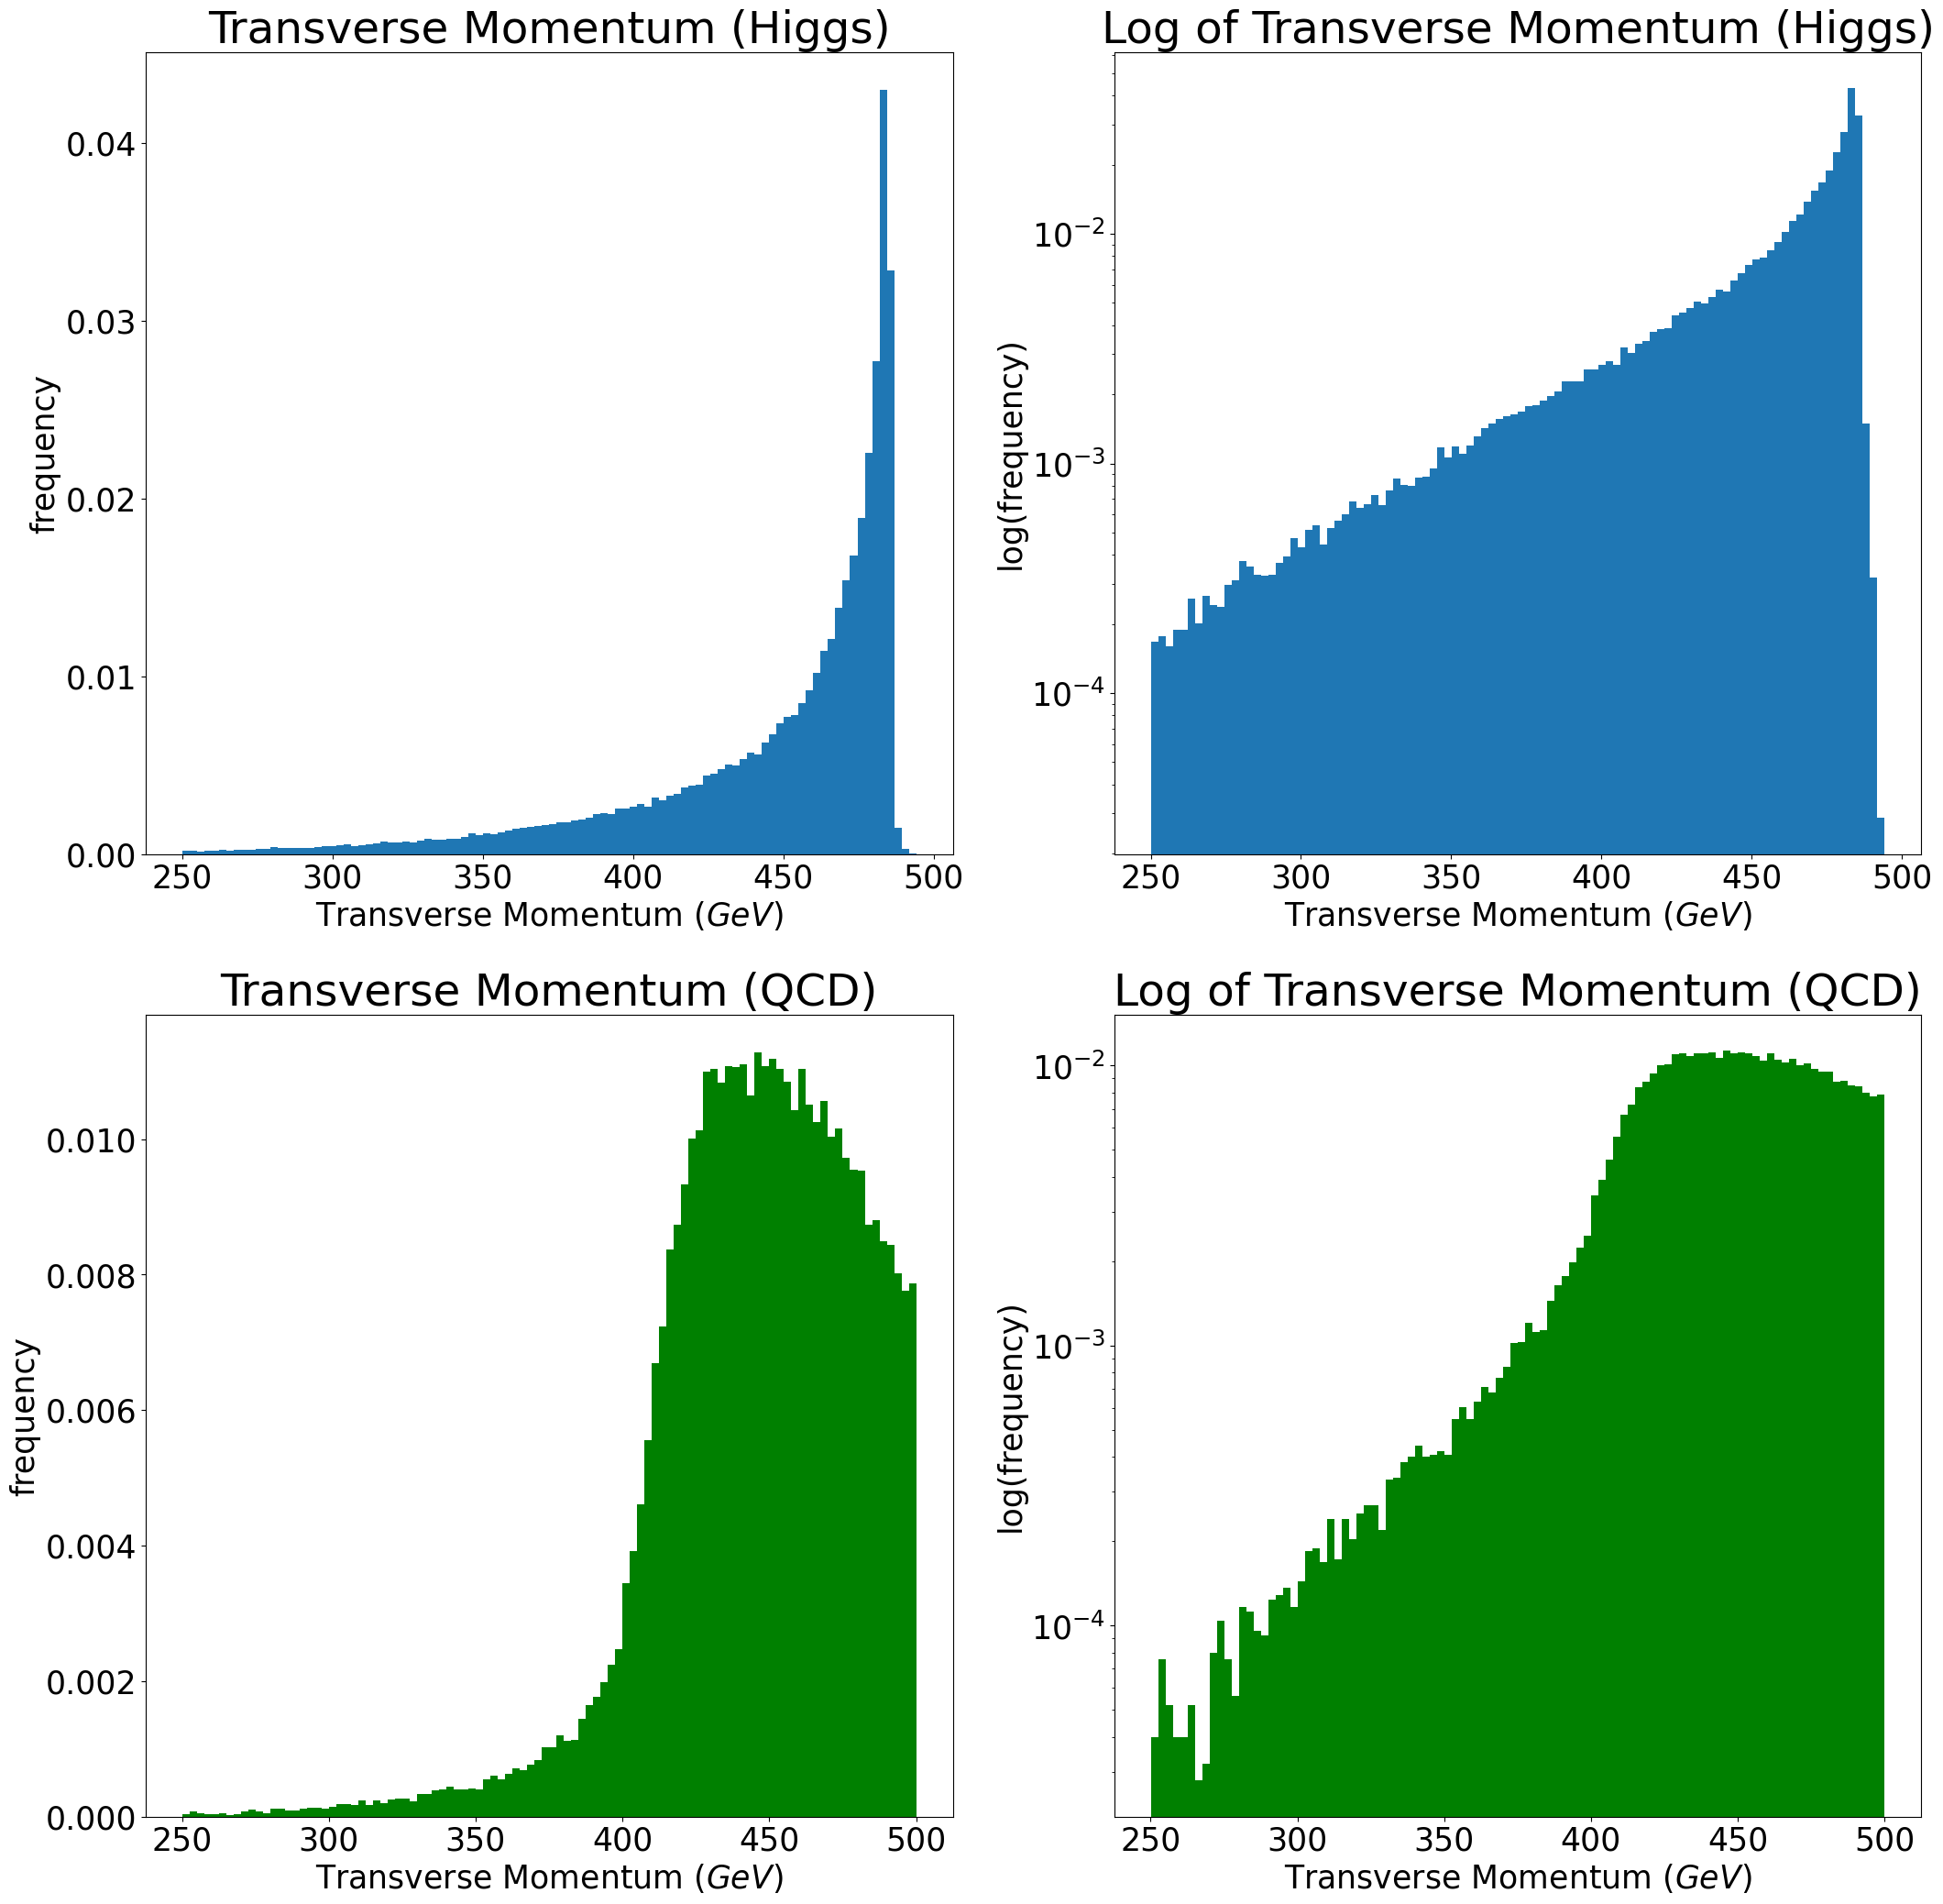

In [5]:
histAndLogHist('pt', 'Transverse Momentum', r' $(GeV)$')

##### Transverse momenta analysis:

From the graphs above we can see that the transverse momentum measurement is a pretty good way to discriminate between our desired Higgs signal and the background (QCD). 

When we reach the end of the domain of our data (500 GeV), we see that the Higgs signal peaks, its sharpest rise in frequency occurring at that point.
However, with our background signal, we see its sharpest peak at roughly 400-450 GeV, then the frequency dropping after that.

### Pseudorapidity

Pseudorapidity is a geometric quantity defined as:

$\eta \equiv ln(cot(\frac{\theta}{2}))$

which is a function of $\theta$, the polar angle, relative to the beam direction.

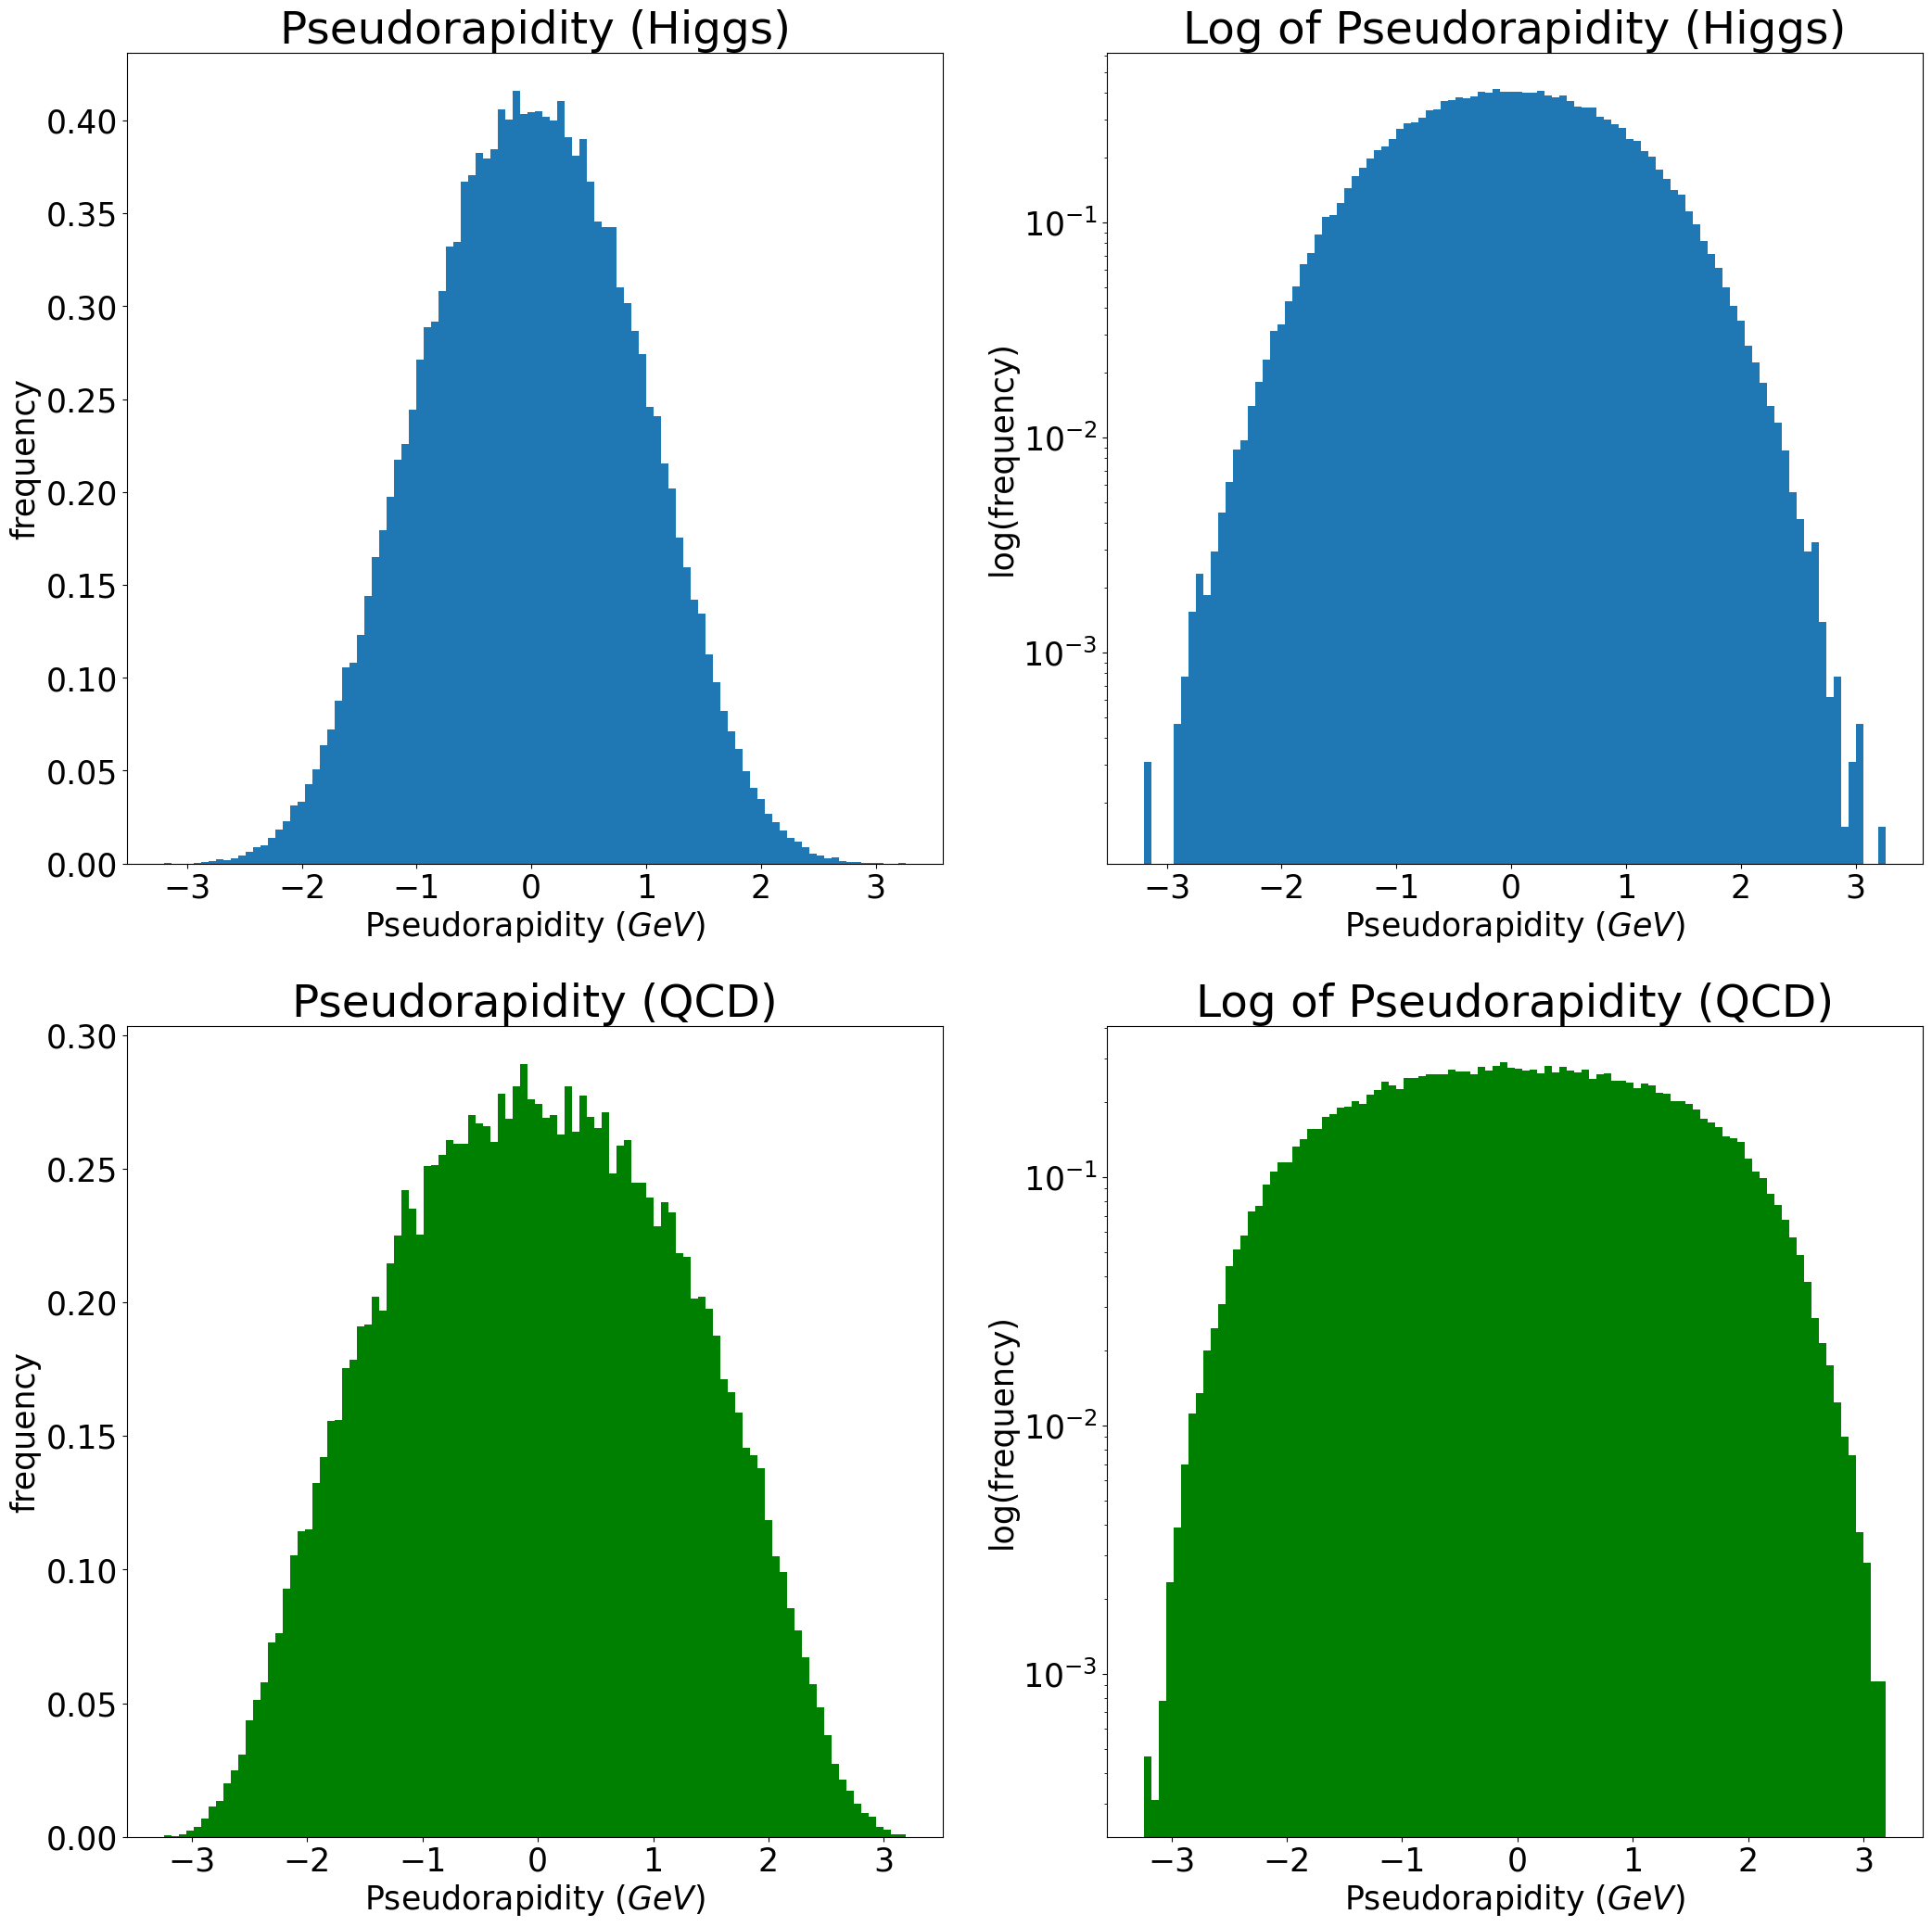

In [6]:
histAndLogHist('eta', 'Pseudorapidity', r' $(GeV)$')

##### Pseudorapidity analysis:

By plotting the frequency with respect to pseudorapidity, we get to similar plots. Both are quadratics, the background signal just happens to have a larger width.

The Higgs data appears to be Gaussian like by examining the shape of the distribution with respect to the logarithmic plot, while the qcd data does not. The tails may provide to be a useful distinguishing feature if we wish to utilize this feature.

### Azimuthal angle

Azimuthal angle is a measurement of the angle rotated with respect to the axis of the beam angle. Due to the this measurement being an axis of symmetry of the system, we will expect that the data be near uniform. After all, this symmetry is by design of the LHC.

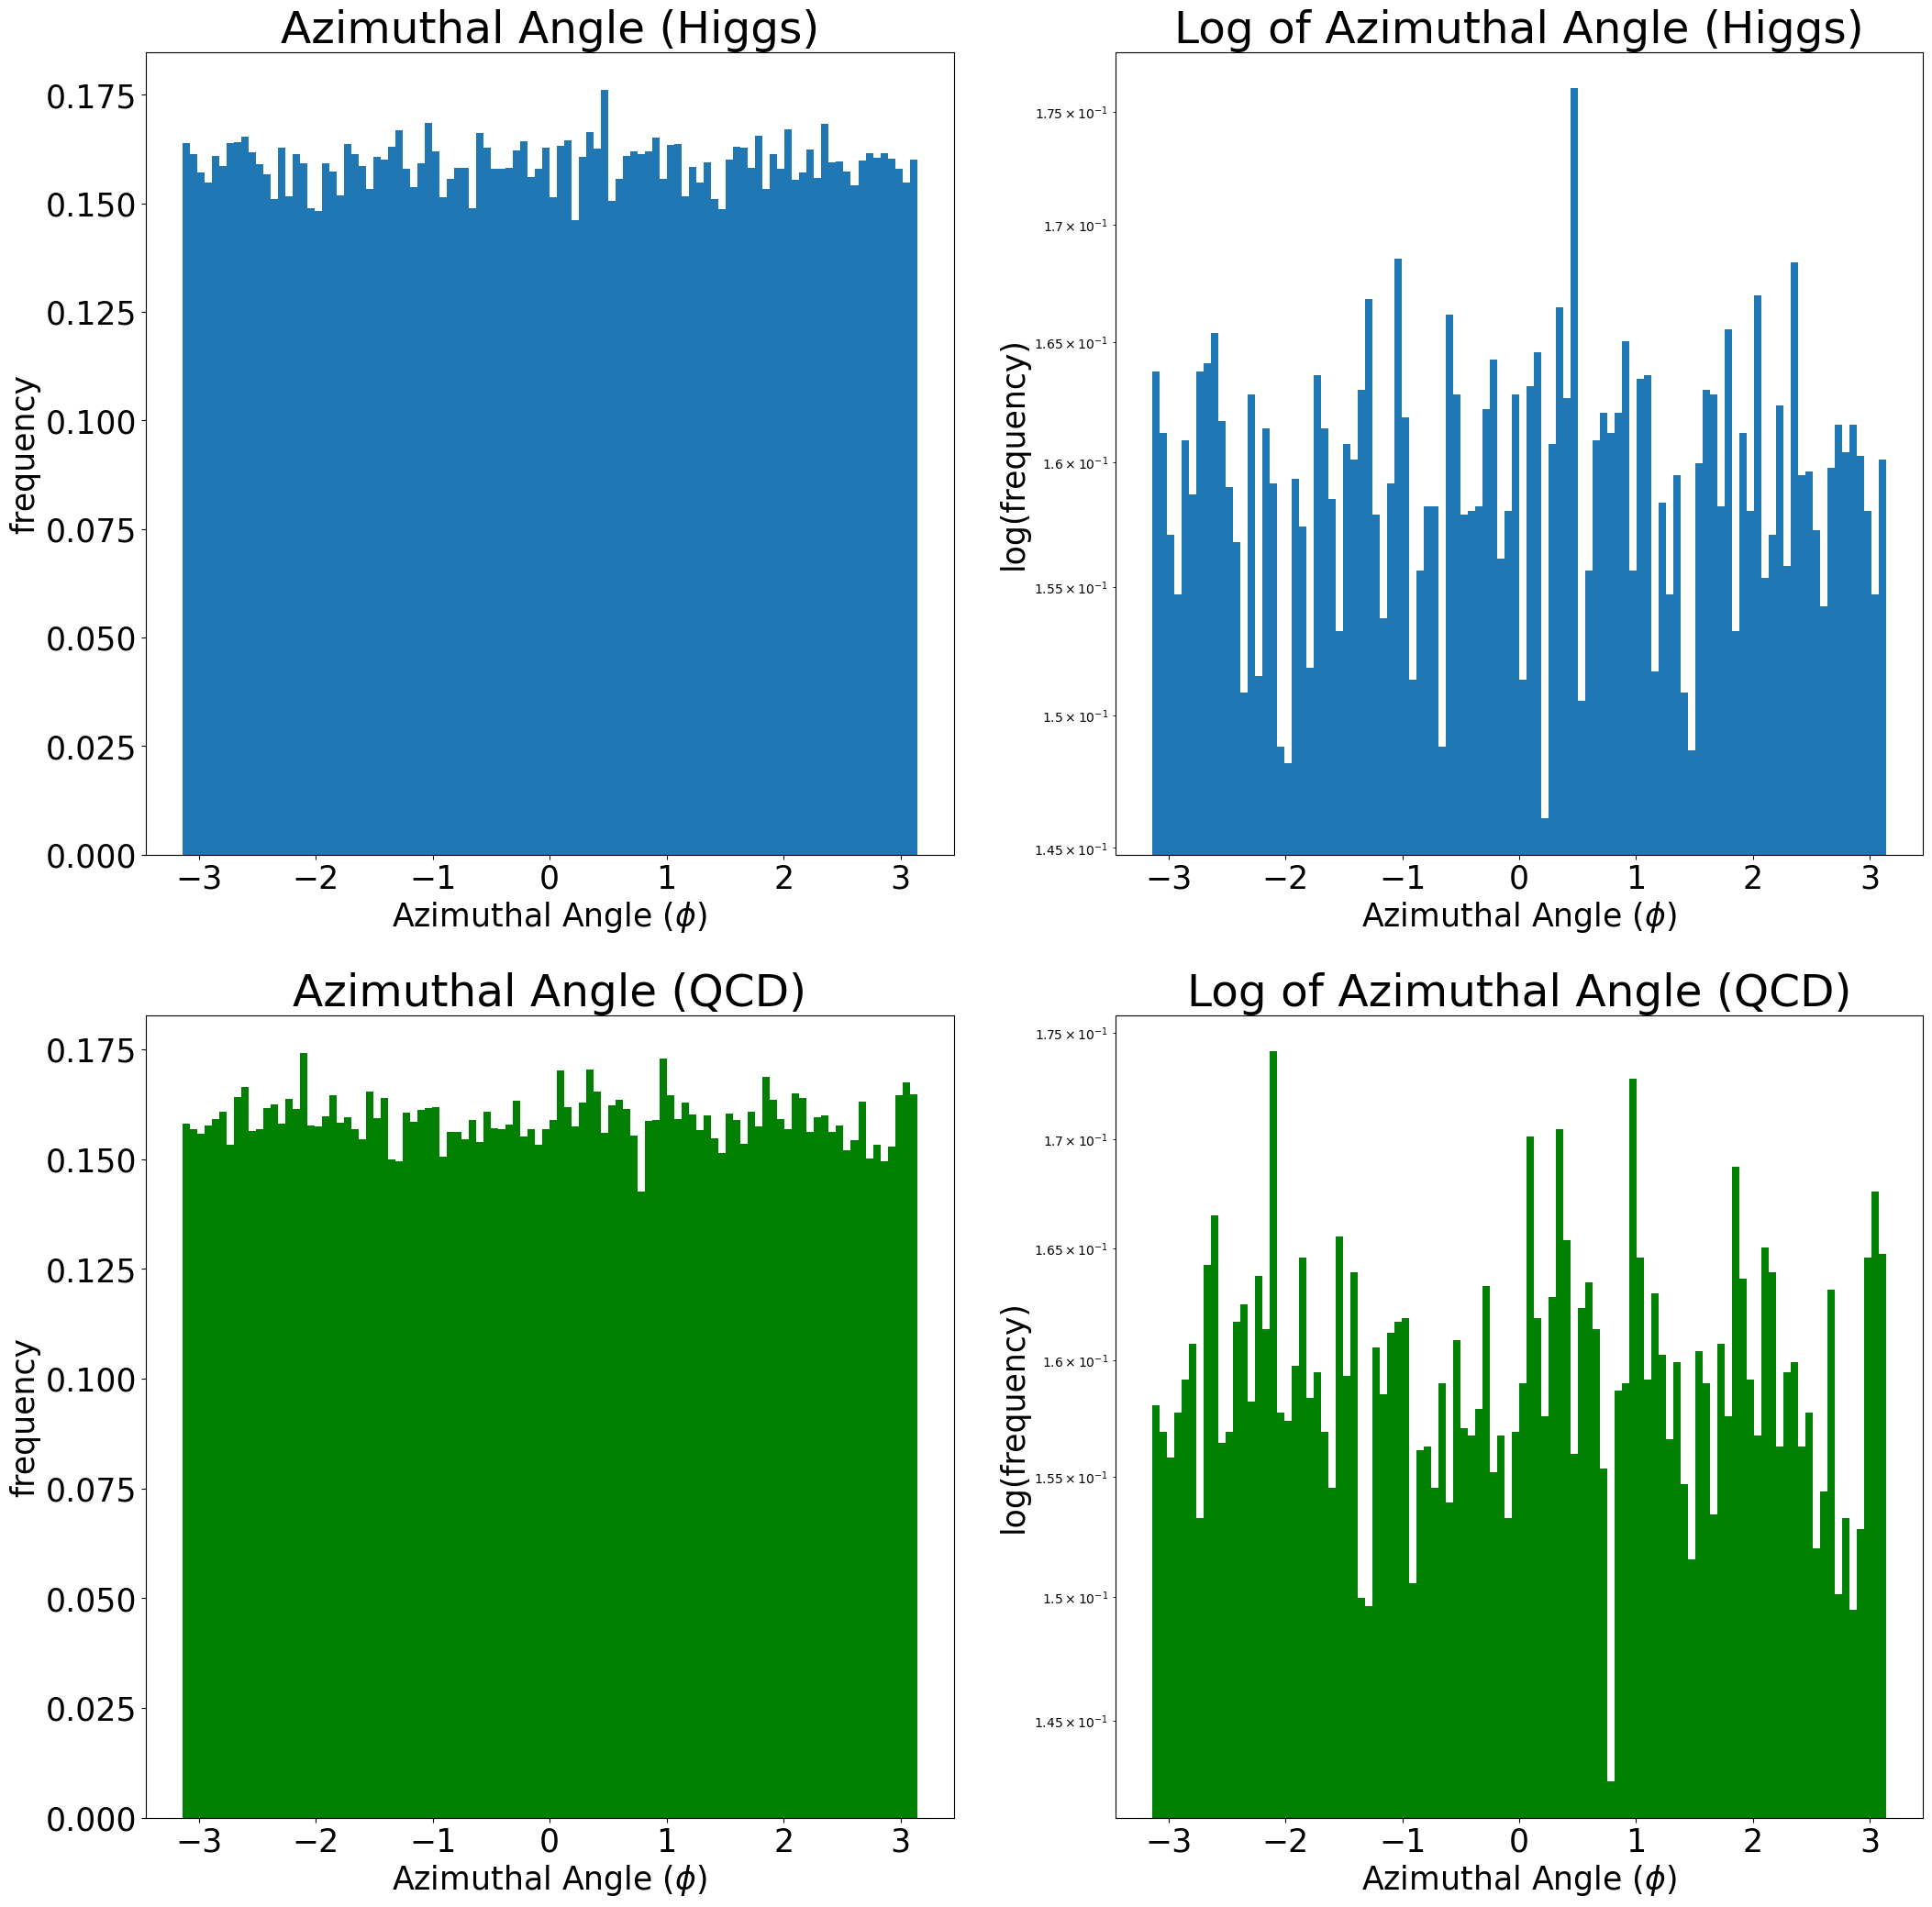

In [7]:
histAndLogHist('phi', 'Azimuthal Angle', r' $(\phi$)')

##### Azimuthal angle analysis:

These signals both appear to be noise. And even if it is not, qualitatively, these signals are extremely similar. We must look elsewhere.

### Invariant (Rest) Mass

This is simply a characteristic of the particle's total energy and momentum with respect to all reference frames.

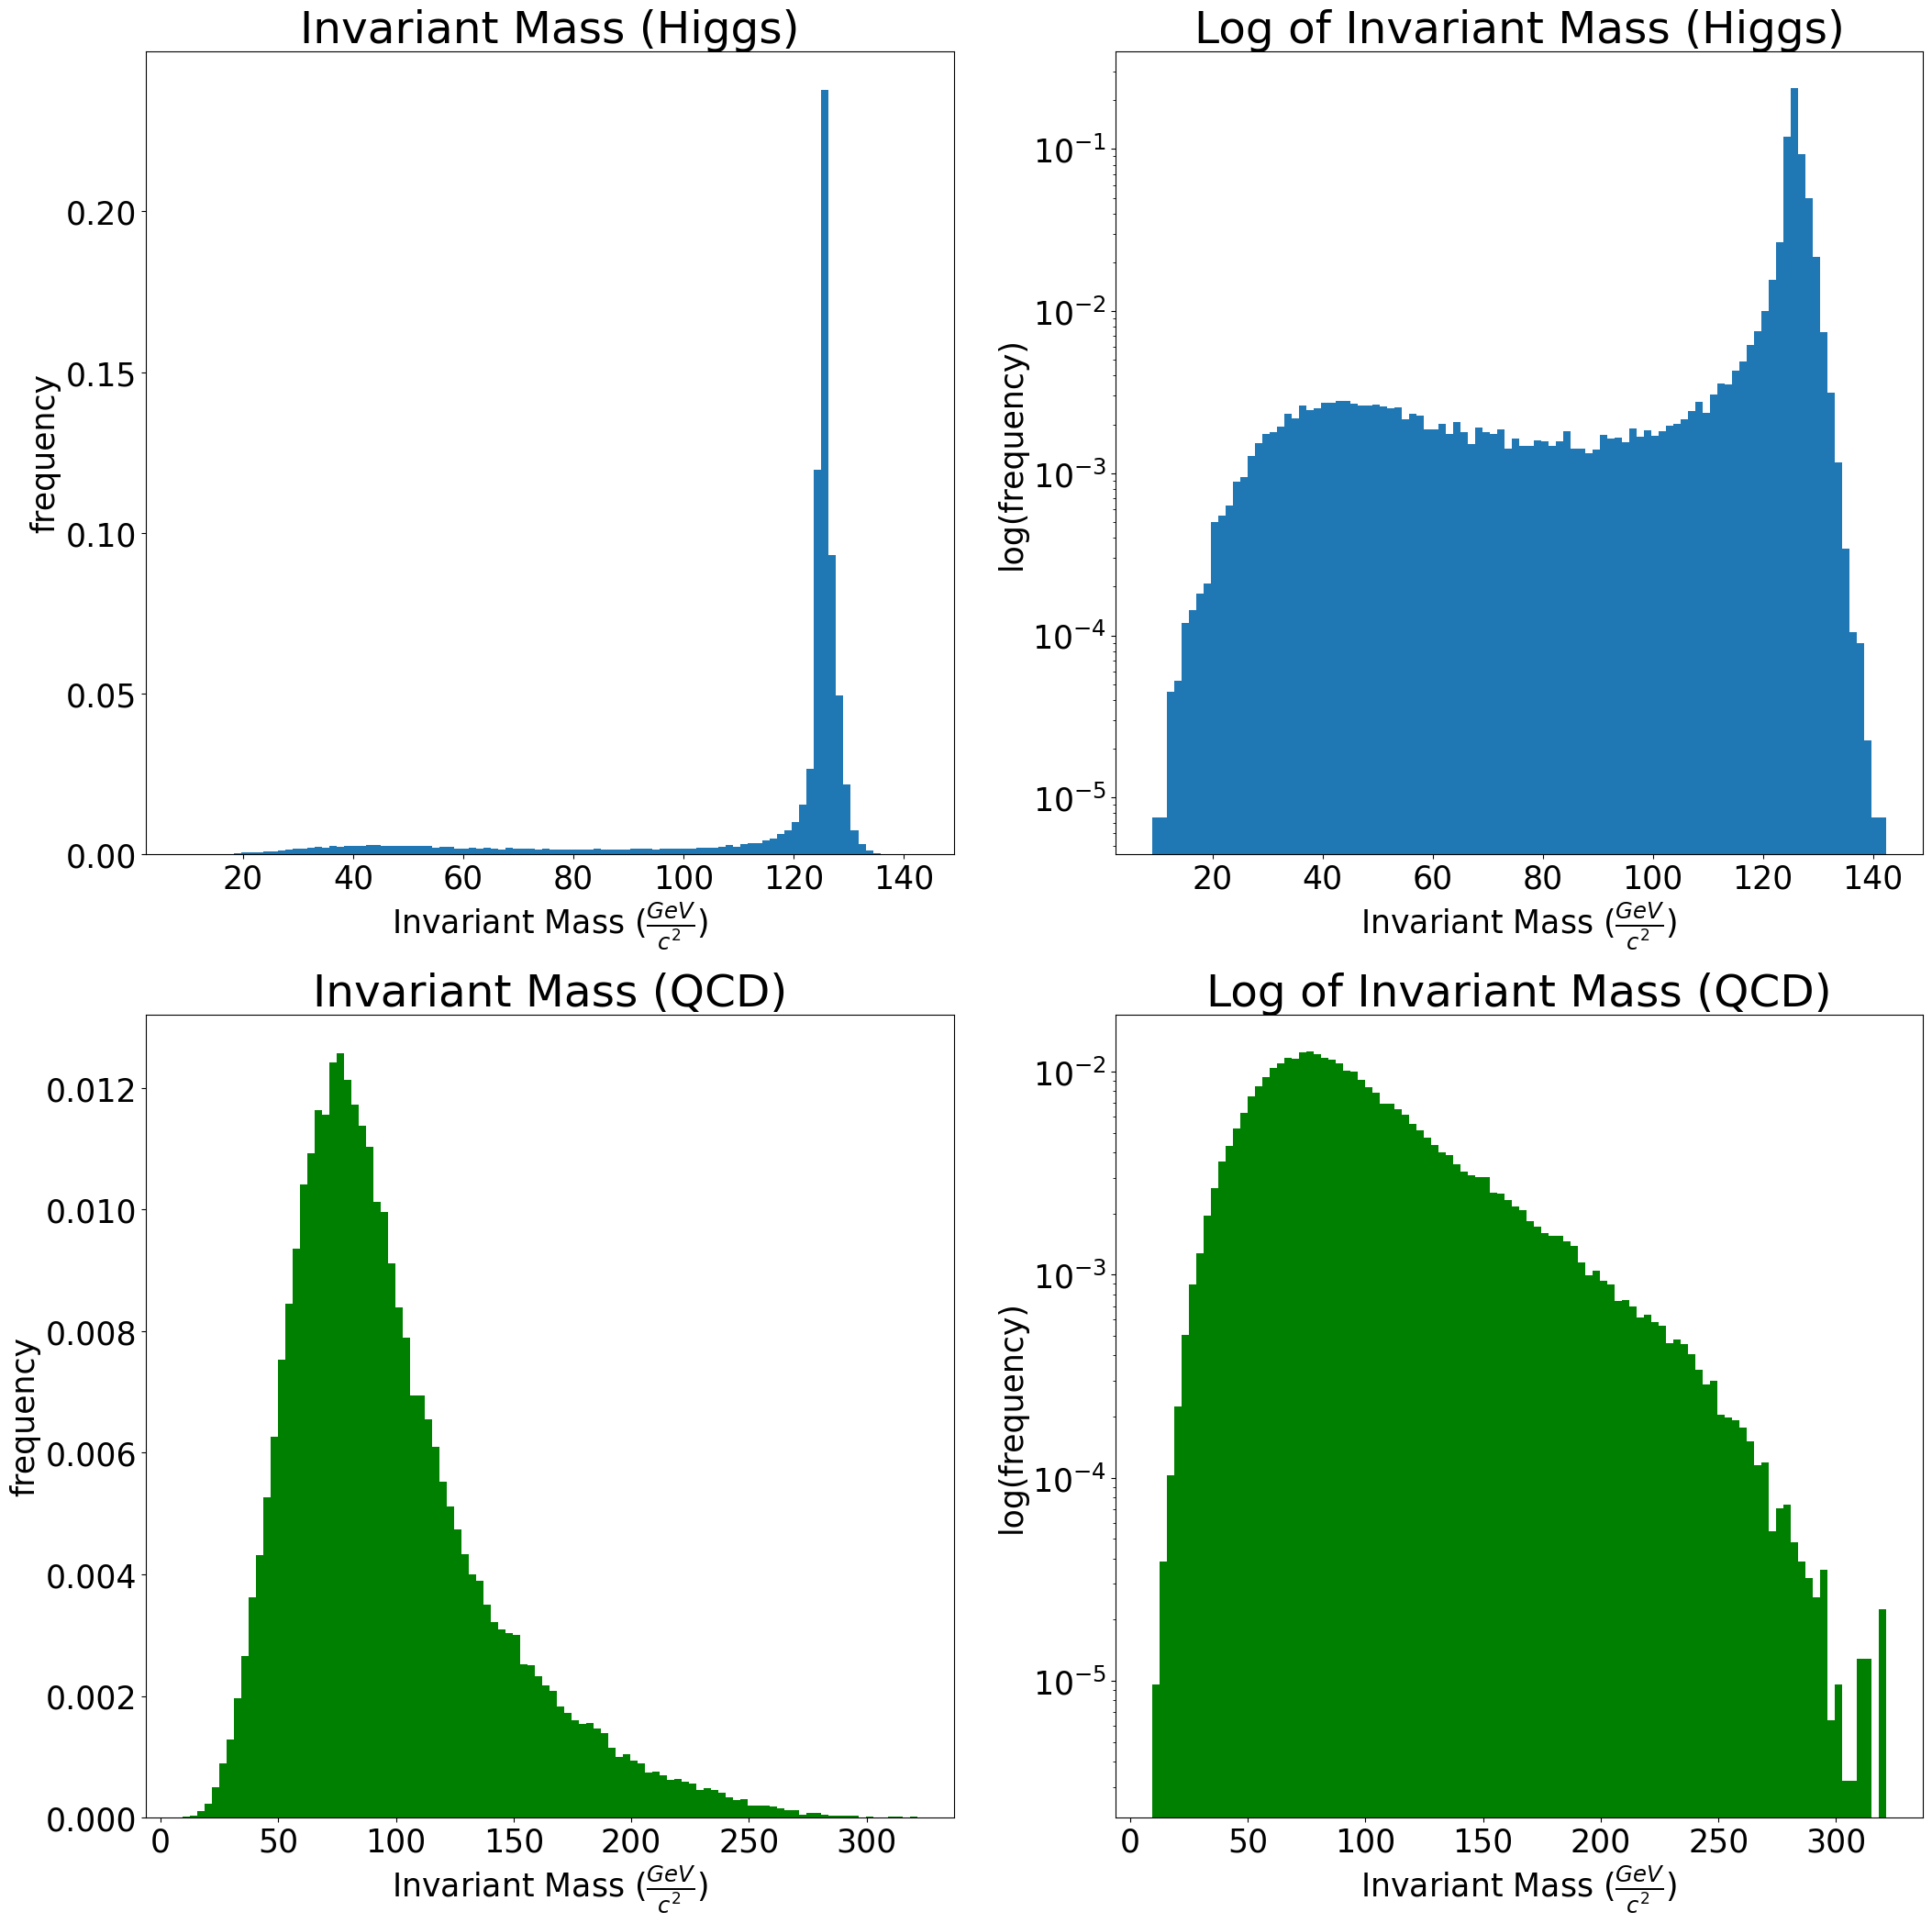

In [8]:
histAndLogHist('mass', 'Invariant Mass', r' $(\frac{GeV}{c^2})$')

##### Invariant mass analysis:

This is a great metric to discriminate between our signals!

The peaks are in different places, and the domain is wildly different. The invariant mass of higgs data only spans to roughly 140 $\frac{GeV}{c^2}$, while the qcd data reaches up to 320.

The concavity of the Higgs data in the logarithmic scale also varies compared to the qcd logarithmic data.

### N-point ECF

An N-point ECF (energy correlation function) is defined by equation (2.1) in the following paper:

https://link.springer.com/content/pdf/10.1007/JHEP06(2013)108.pdf

The energy distribution from hard scatterings can be described by energy correlation functions in momentum space.
The N-point ECF consists of N energy levels multiplied by N choose 2 pairwise angles raised to angular exponent $\beta$.

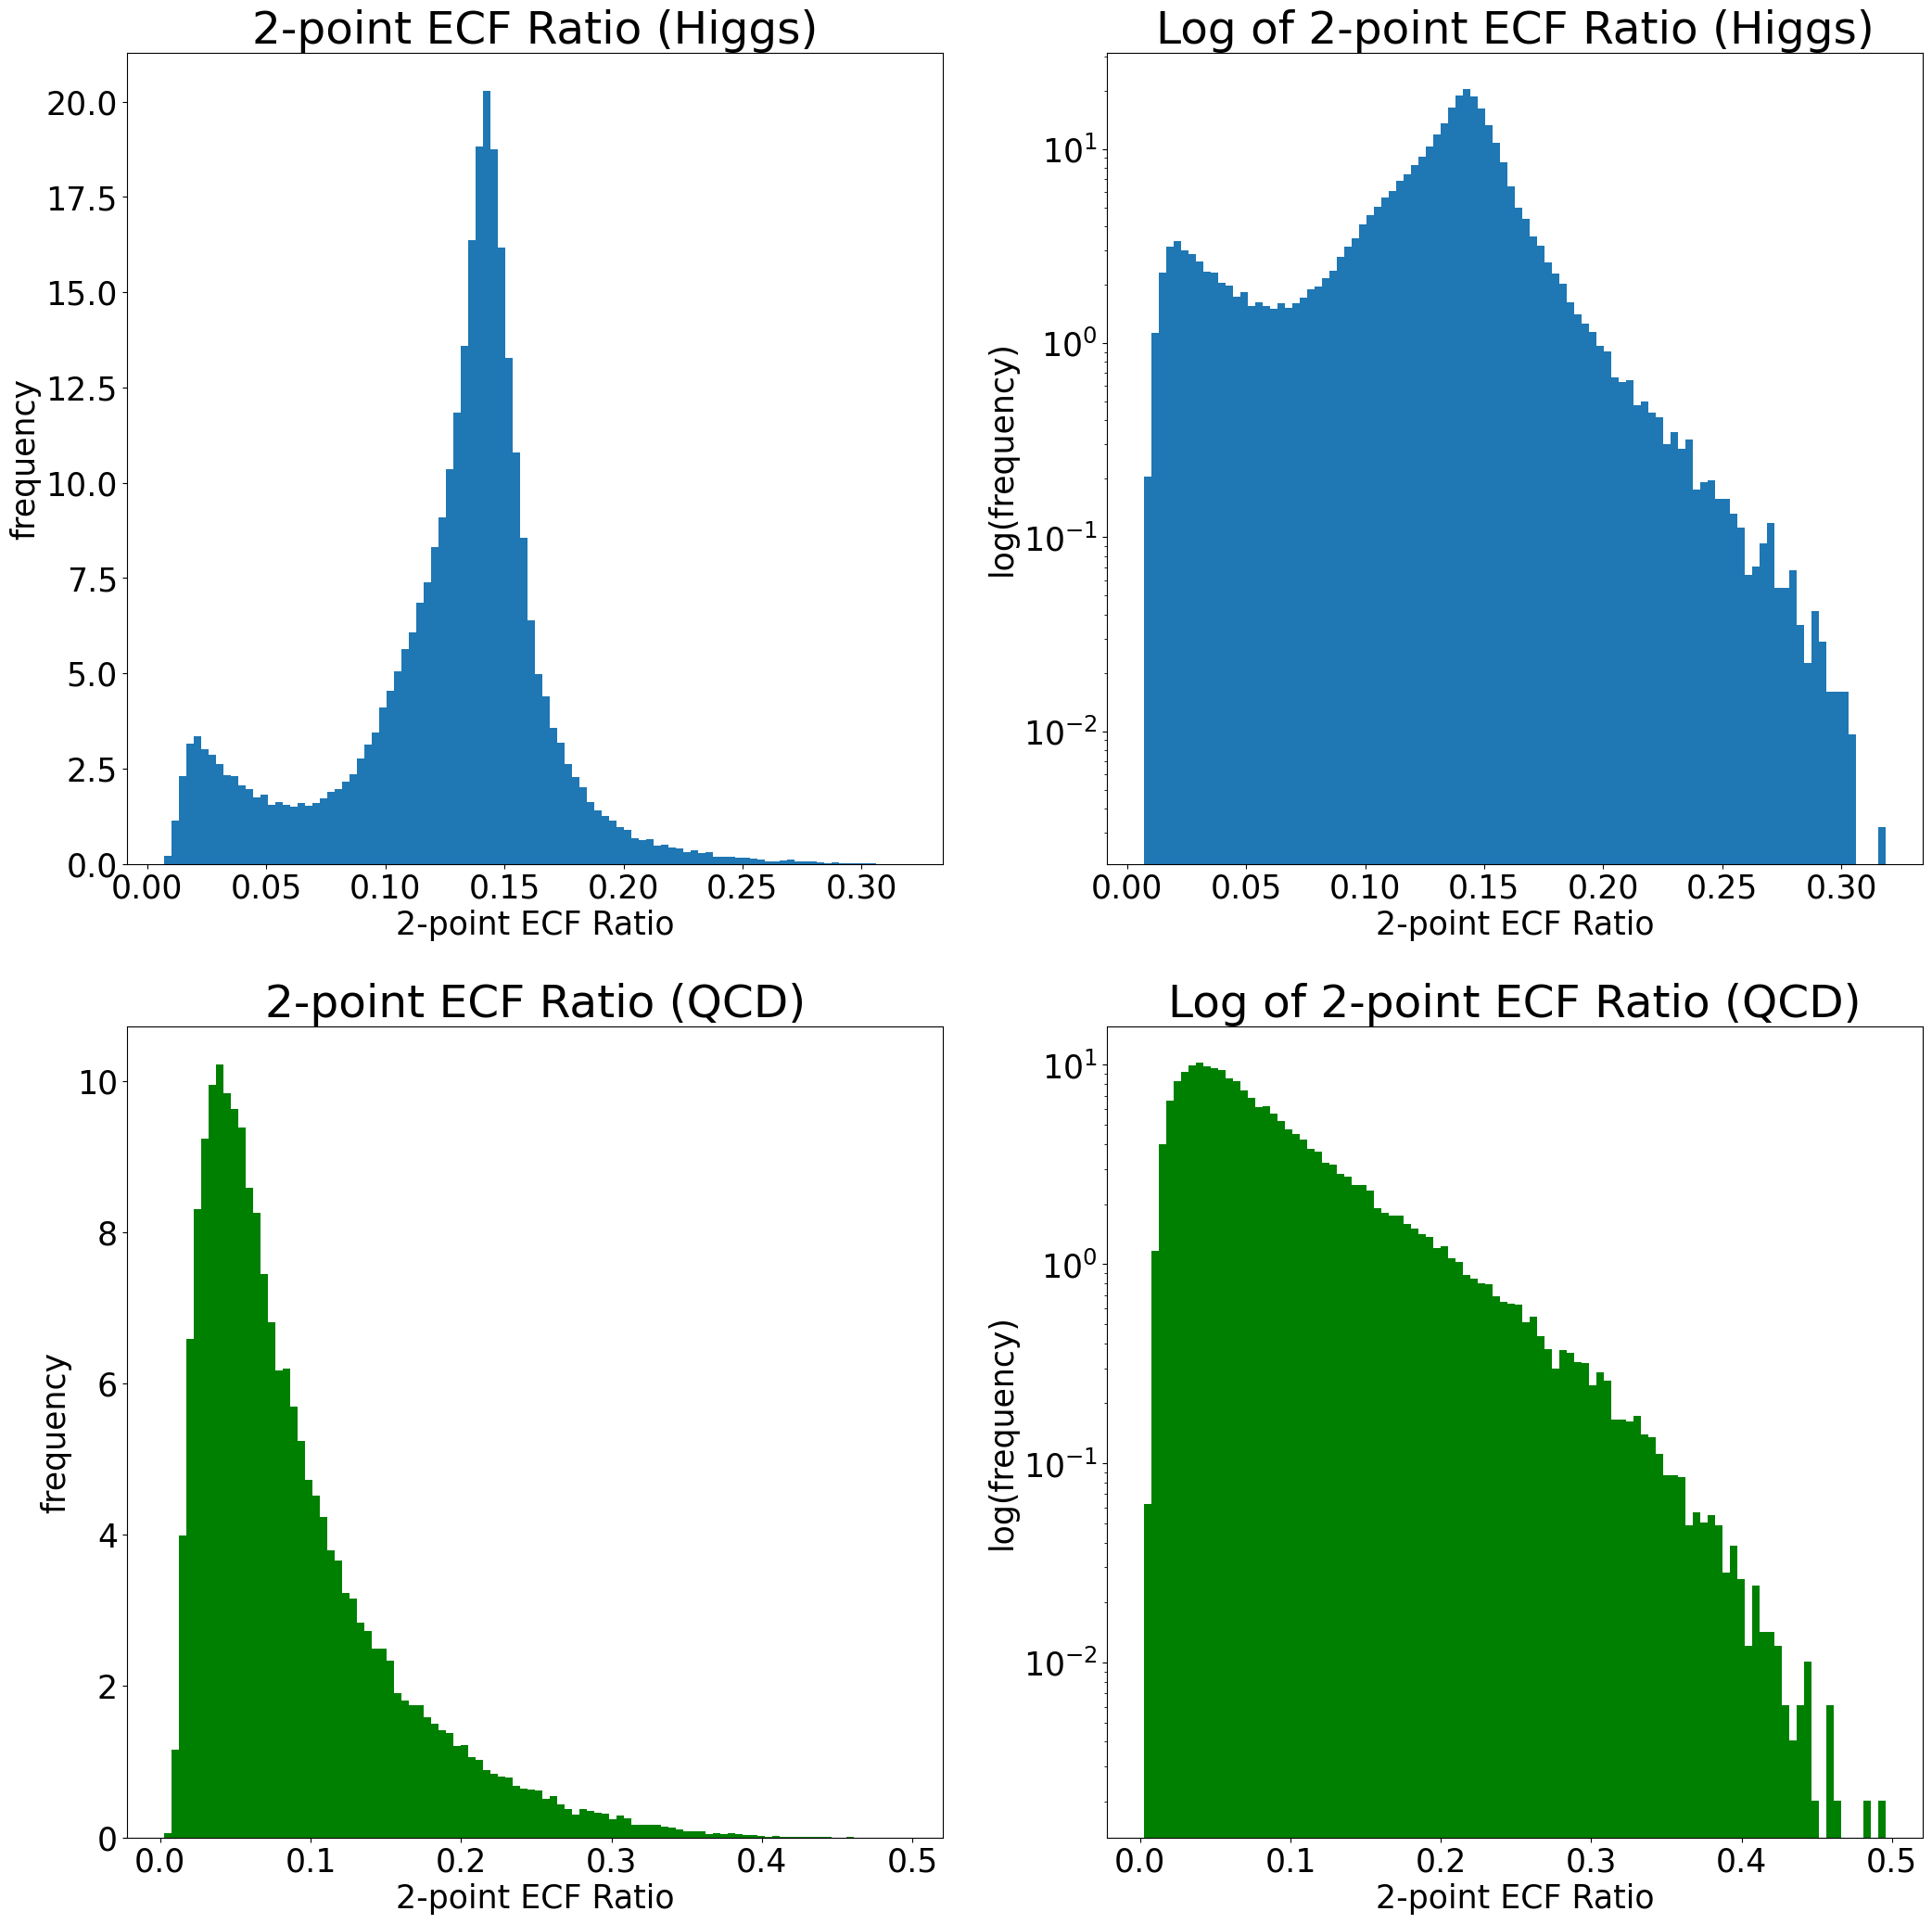

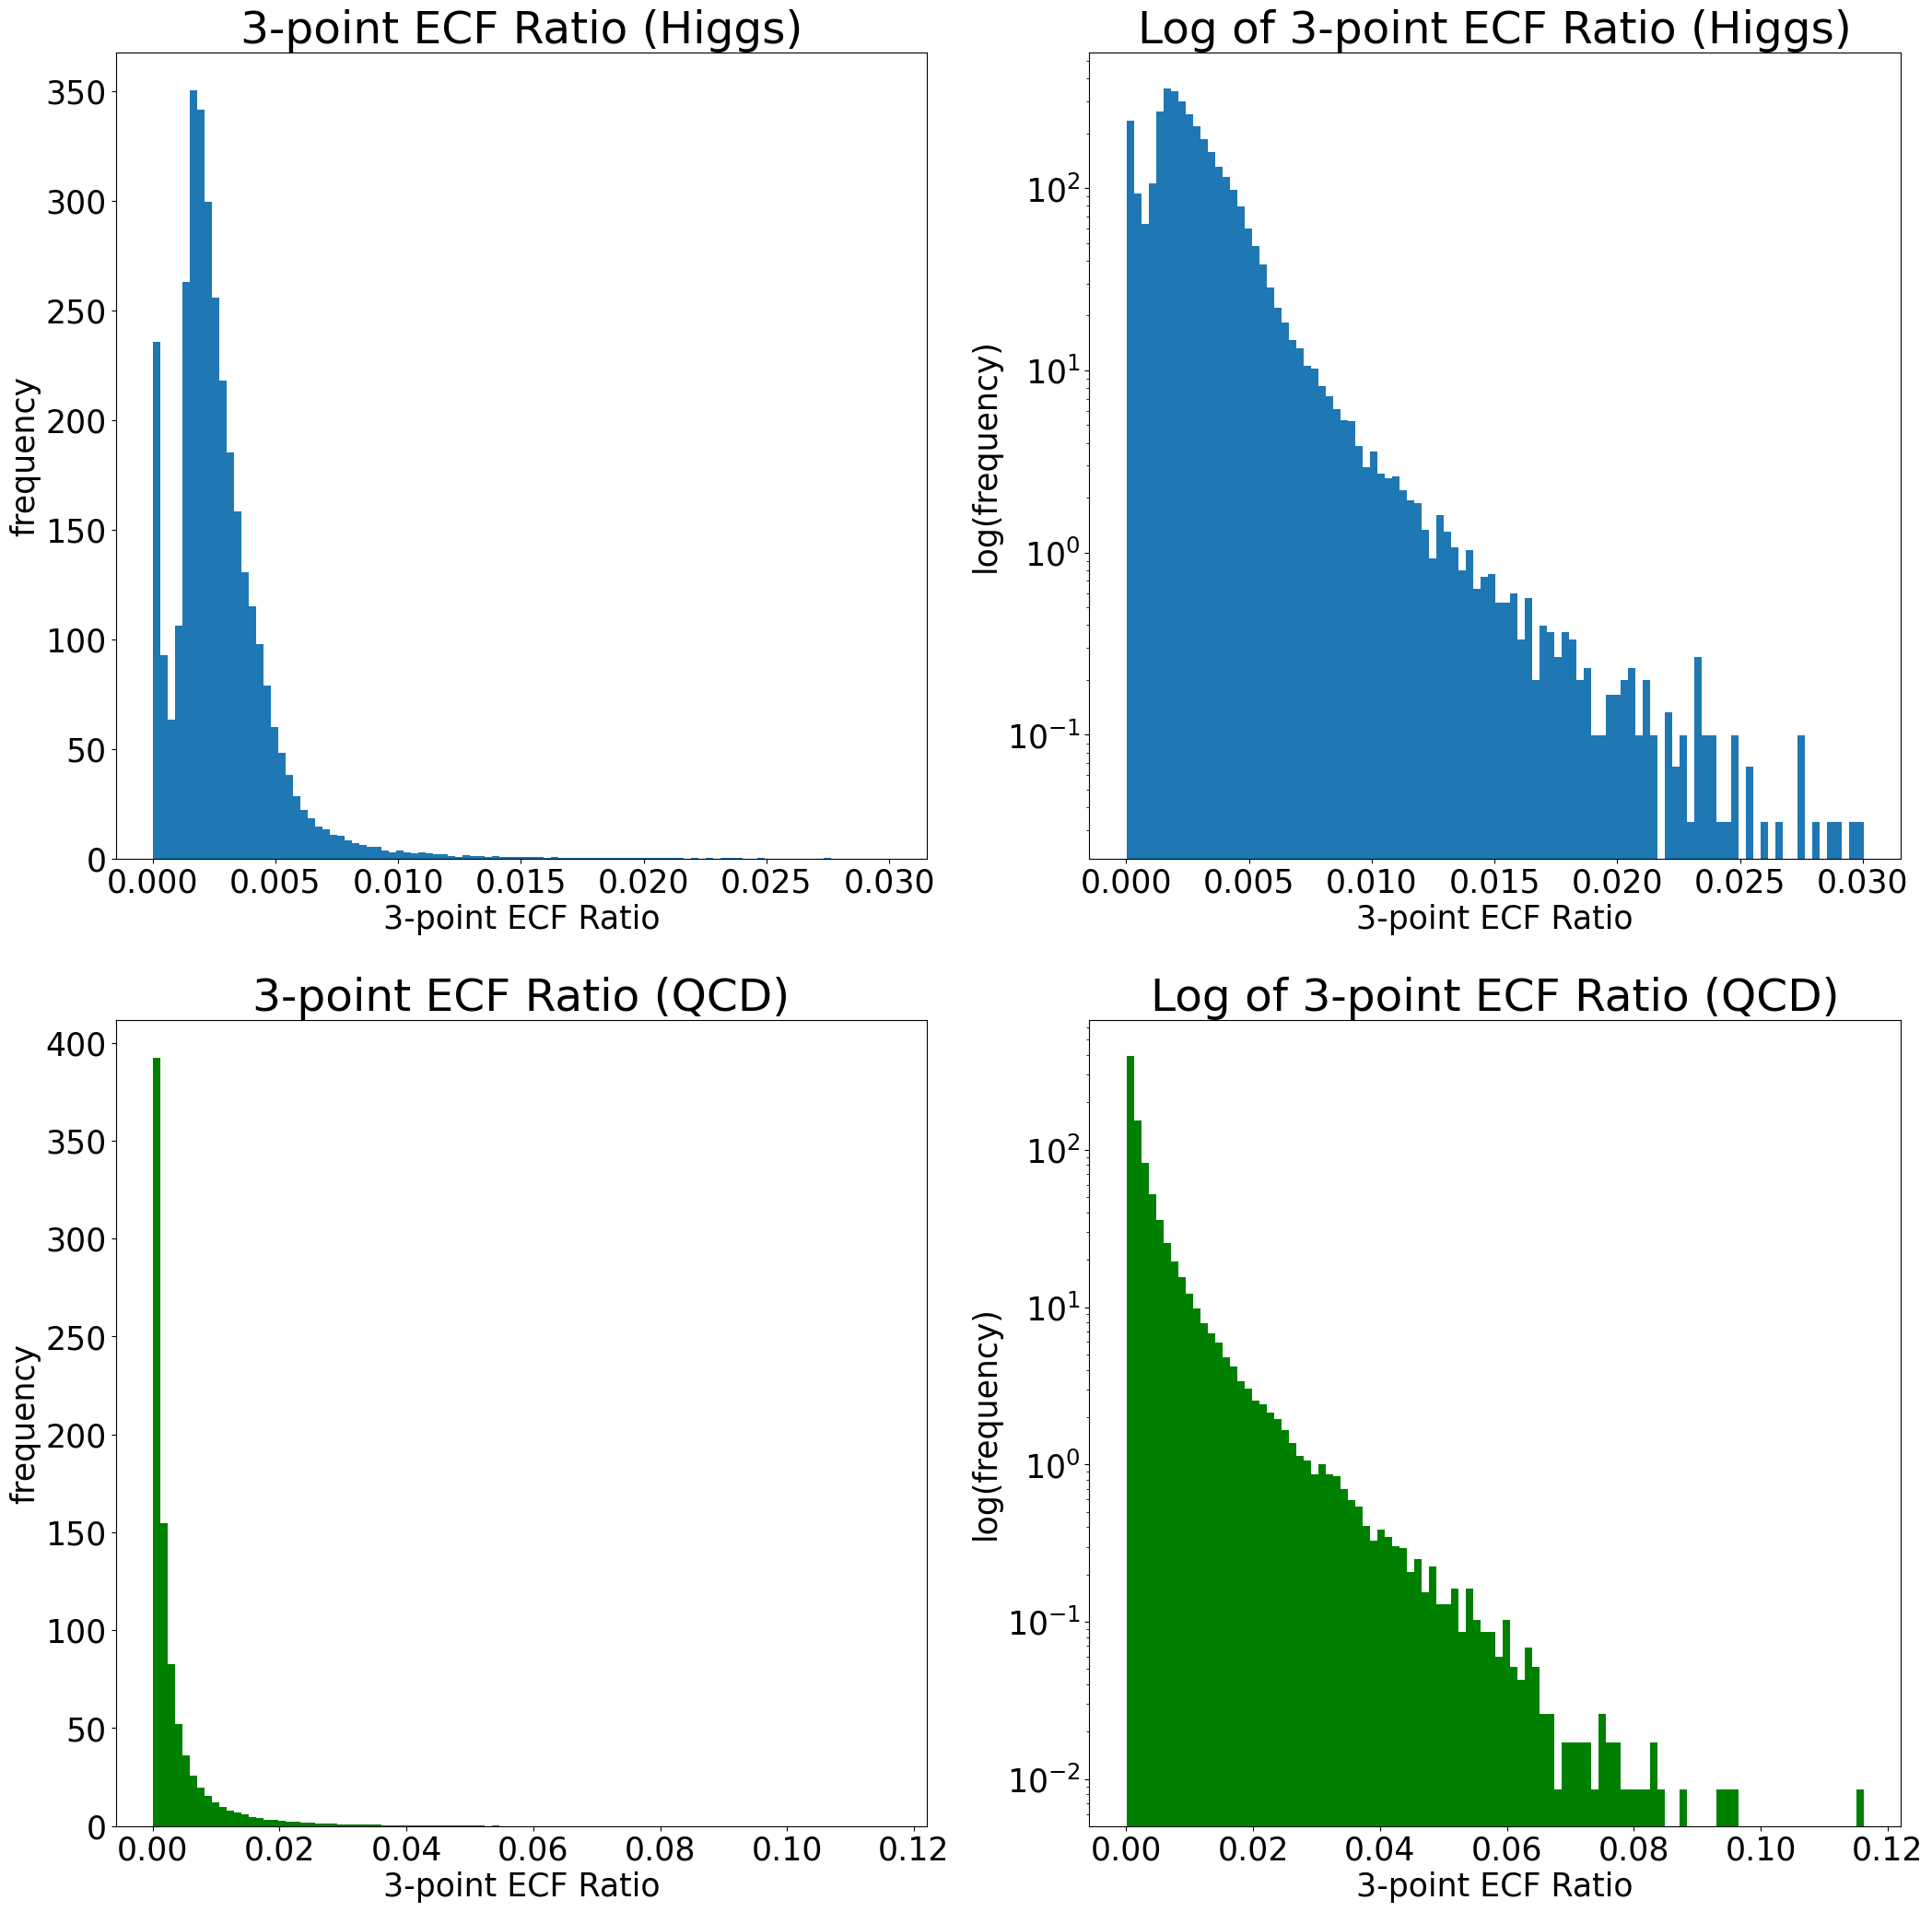

In [9]:
histAndLogHist('ee2', '2-point ECF Ratio', '')
histAndLogHist('ee3', '3-point ECF Ratio', '')

##### N-point ECF analysis:

Here we can see that we can use both 2 and 3 point ECF ratios to clamp values based on the domain of data.

Let's compare the logarithmic graphs between datasets.

In the case of 2-point ECF, Higgs data peaks at around 0.32, while the qcd data has a meaningful amount of data that reaches all the way up 0.5.

In the case of 3-point ECF, Higgs data peaks at around 0.03, while the qcd data has tails off to around 0.08, with bits of data reaching all the way up to 0.12.

### 3-to-2 point ECF Ratio:

This metric is simply a ratio between the 3-point and 2-point ECF ratios.

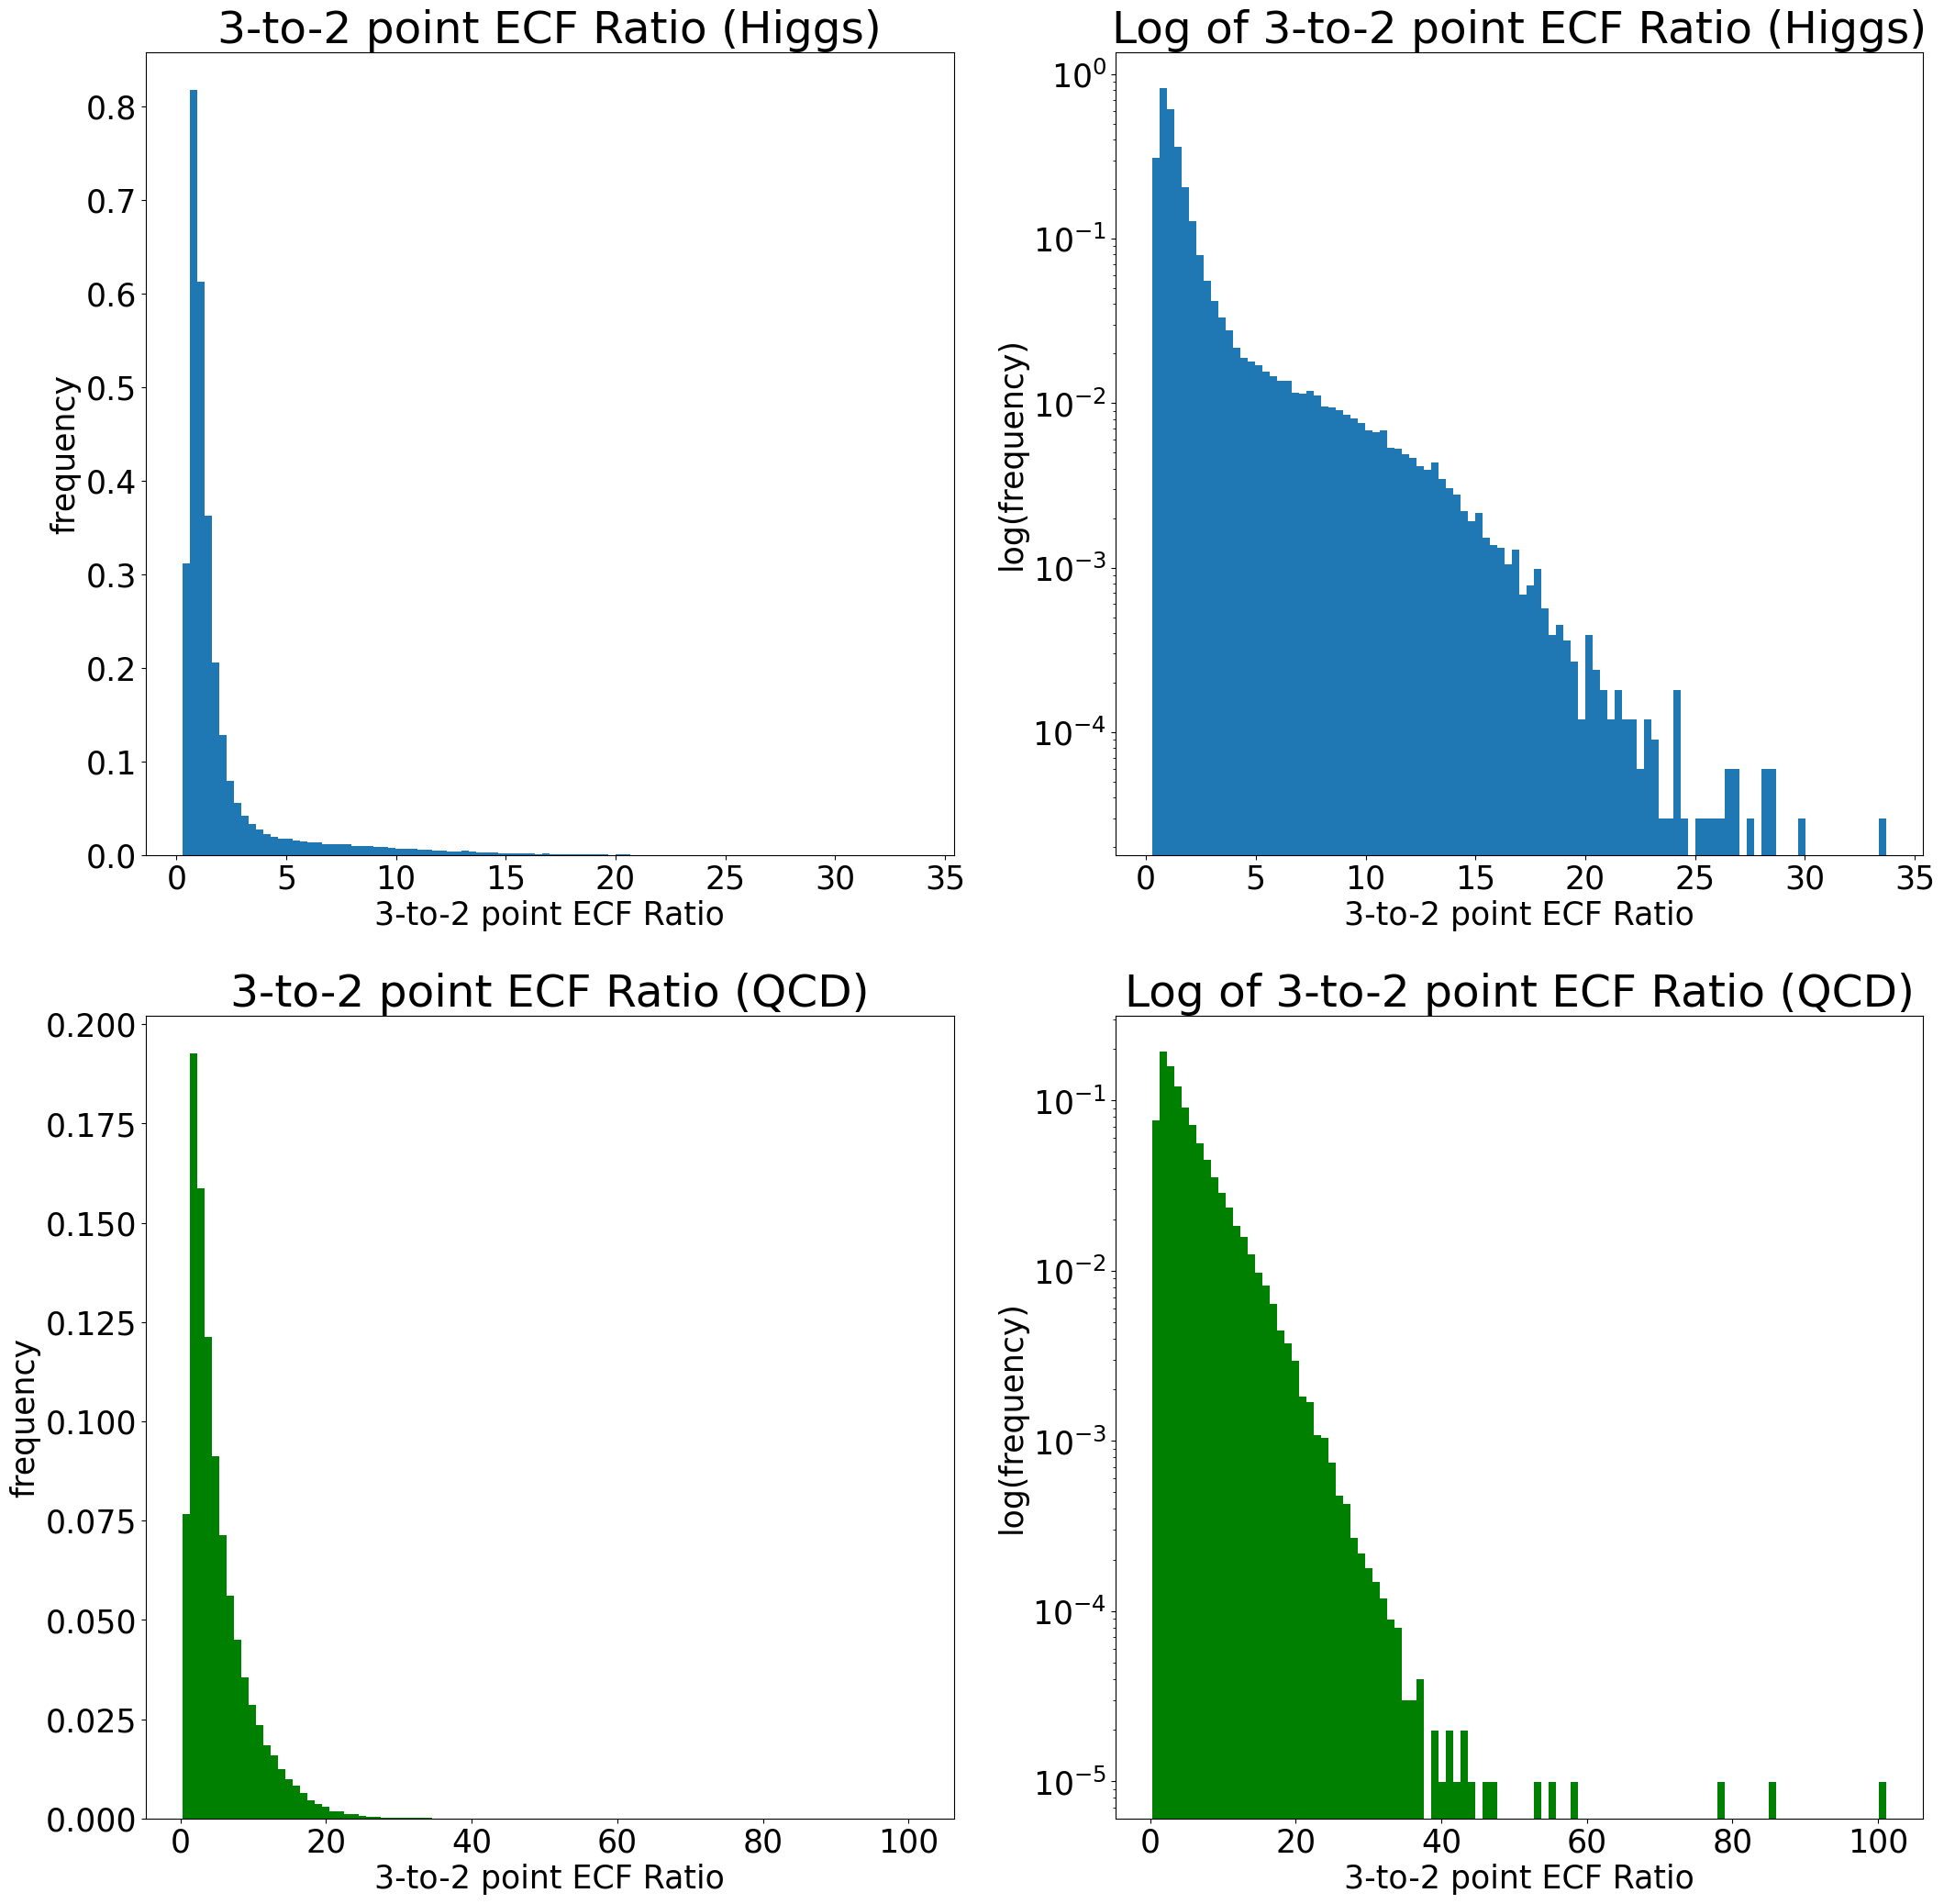

In [10]:
histAndLogHist('d2', '3-to-2 point ECF Ratio', '')

##### 3-to-2 point ECF ratio analysis:

The domains may appear to stretch out for qcd data, but the data there is so sparse it may not make a meaningful difference (but may be worth an extra step).

Aside from the difference in curvature between the logarithmic graphs, this appears to have less discriminatory potential than 2-point and 3-point ECF ratios.

### Angularity and N-subjettiness

Here let's look through both the angularity and N-subjettiness features. 

A jet represents a collection of particles that scatter in a particular direction. The definition of a jet can vary wildly between experiments, but intuitively they can be described as an area that encompasses a given directional area of space (simplest definition is a cone, but can have customize its geometry).

N-subjettiness is one of the jet substructure variables that can capture features of a jet’s internal structure and can potentially give additional discrimination power. N simply refers to the number of axes.

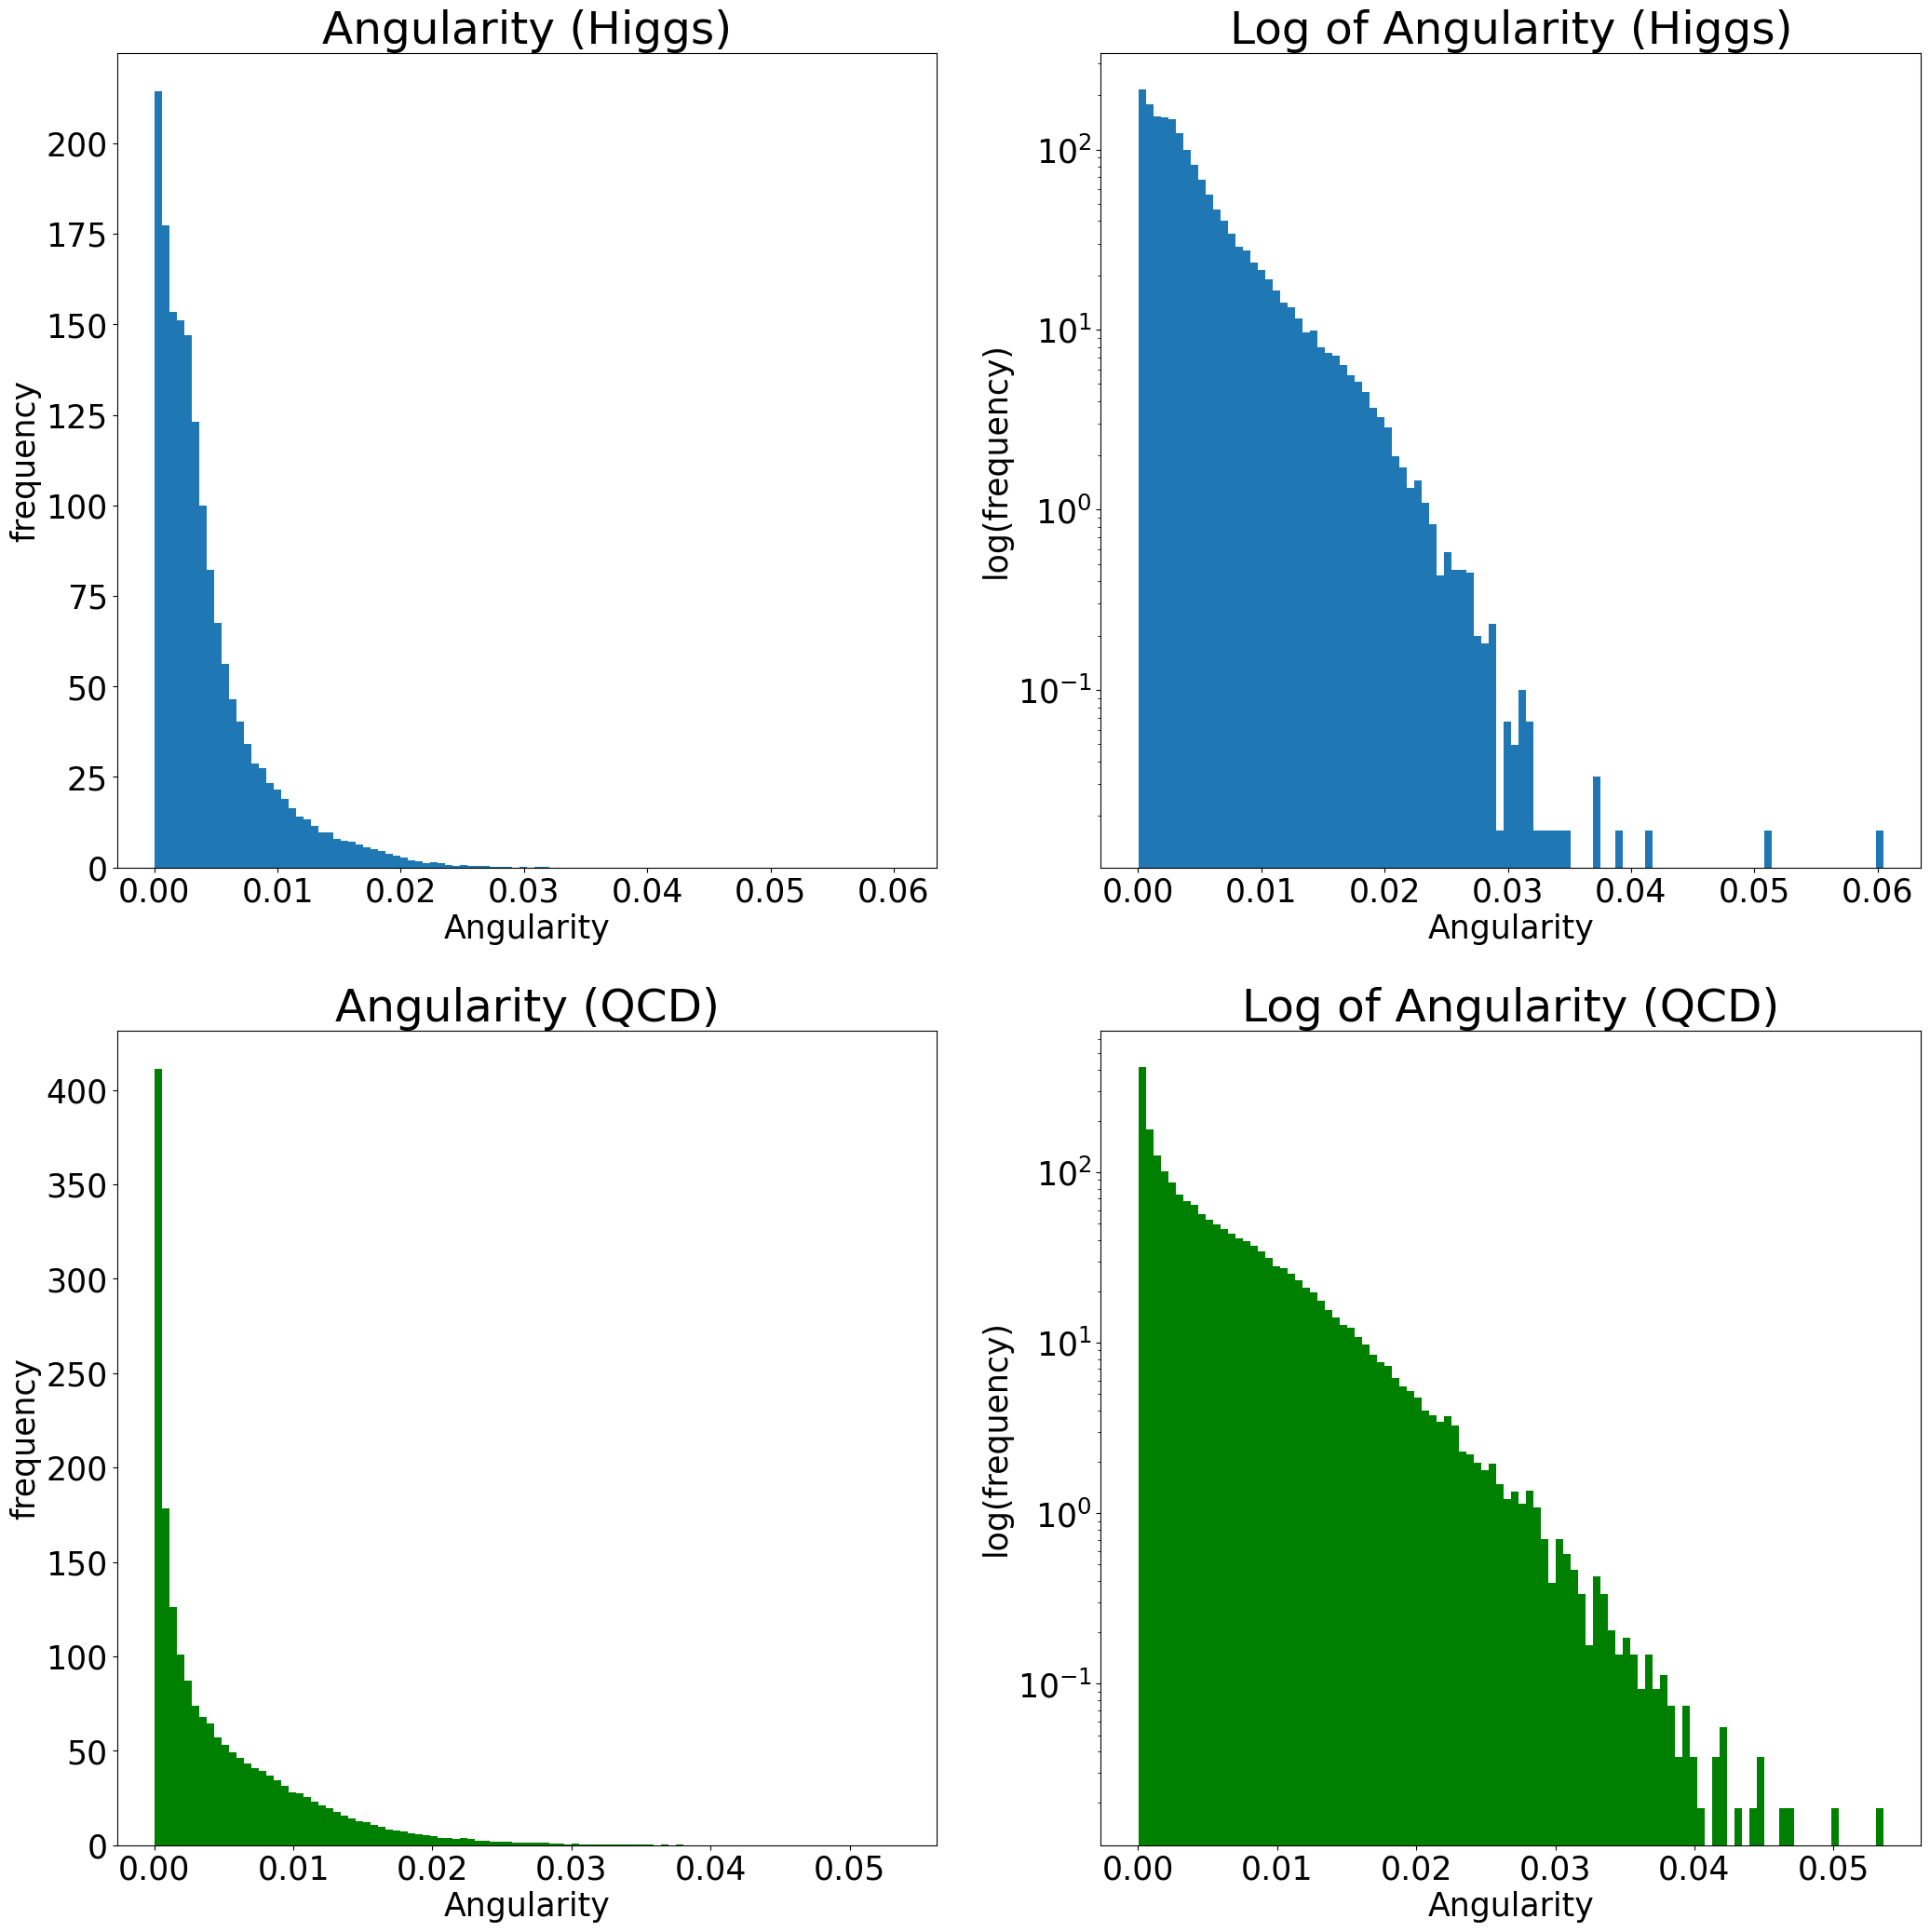

In [11]:
histAndLogHist('angularity', 'Angularity', '')

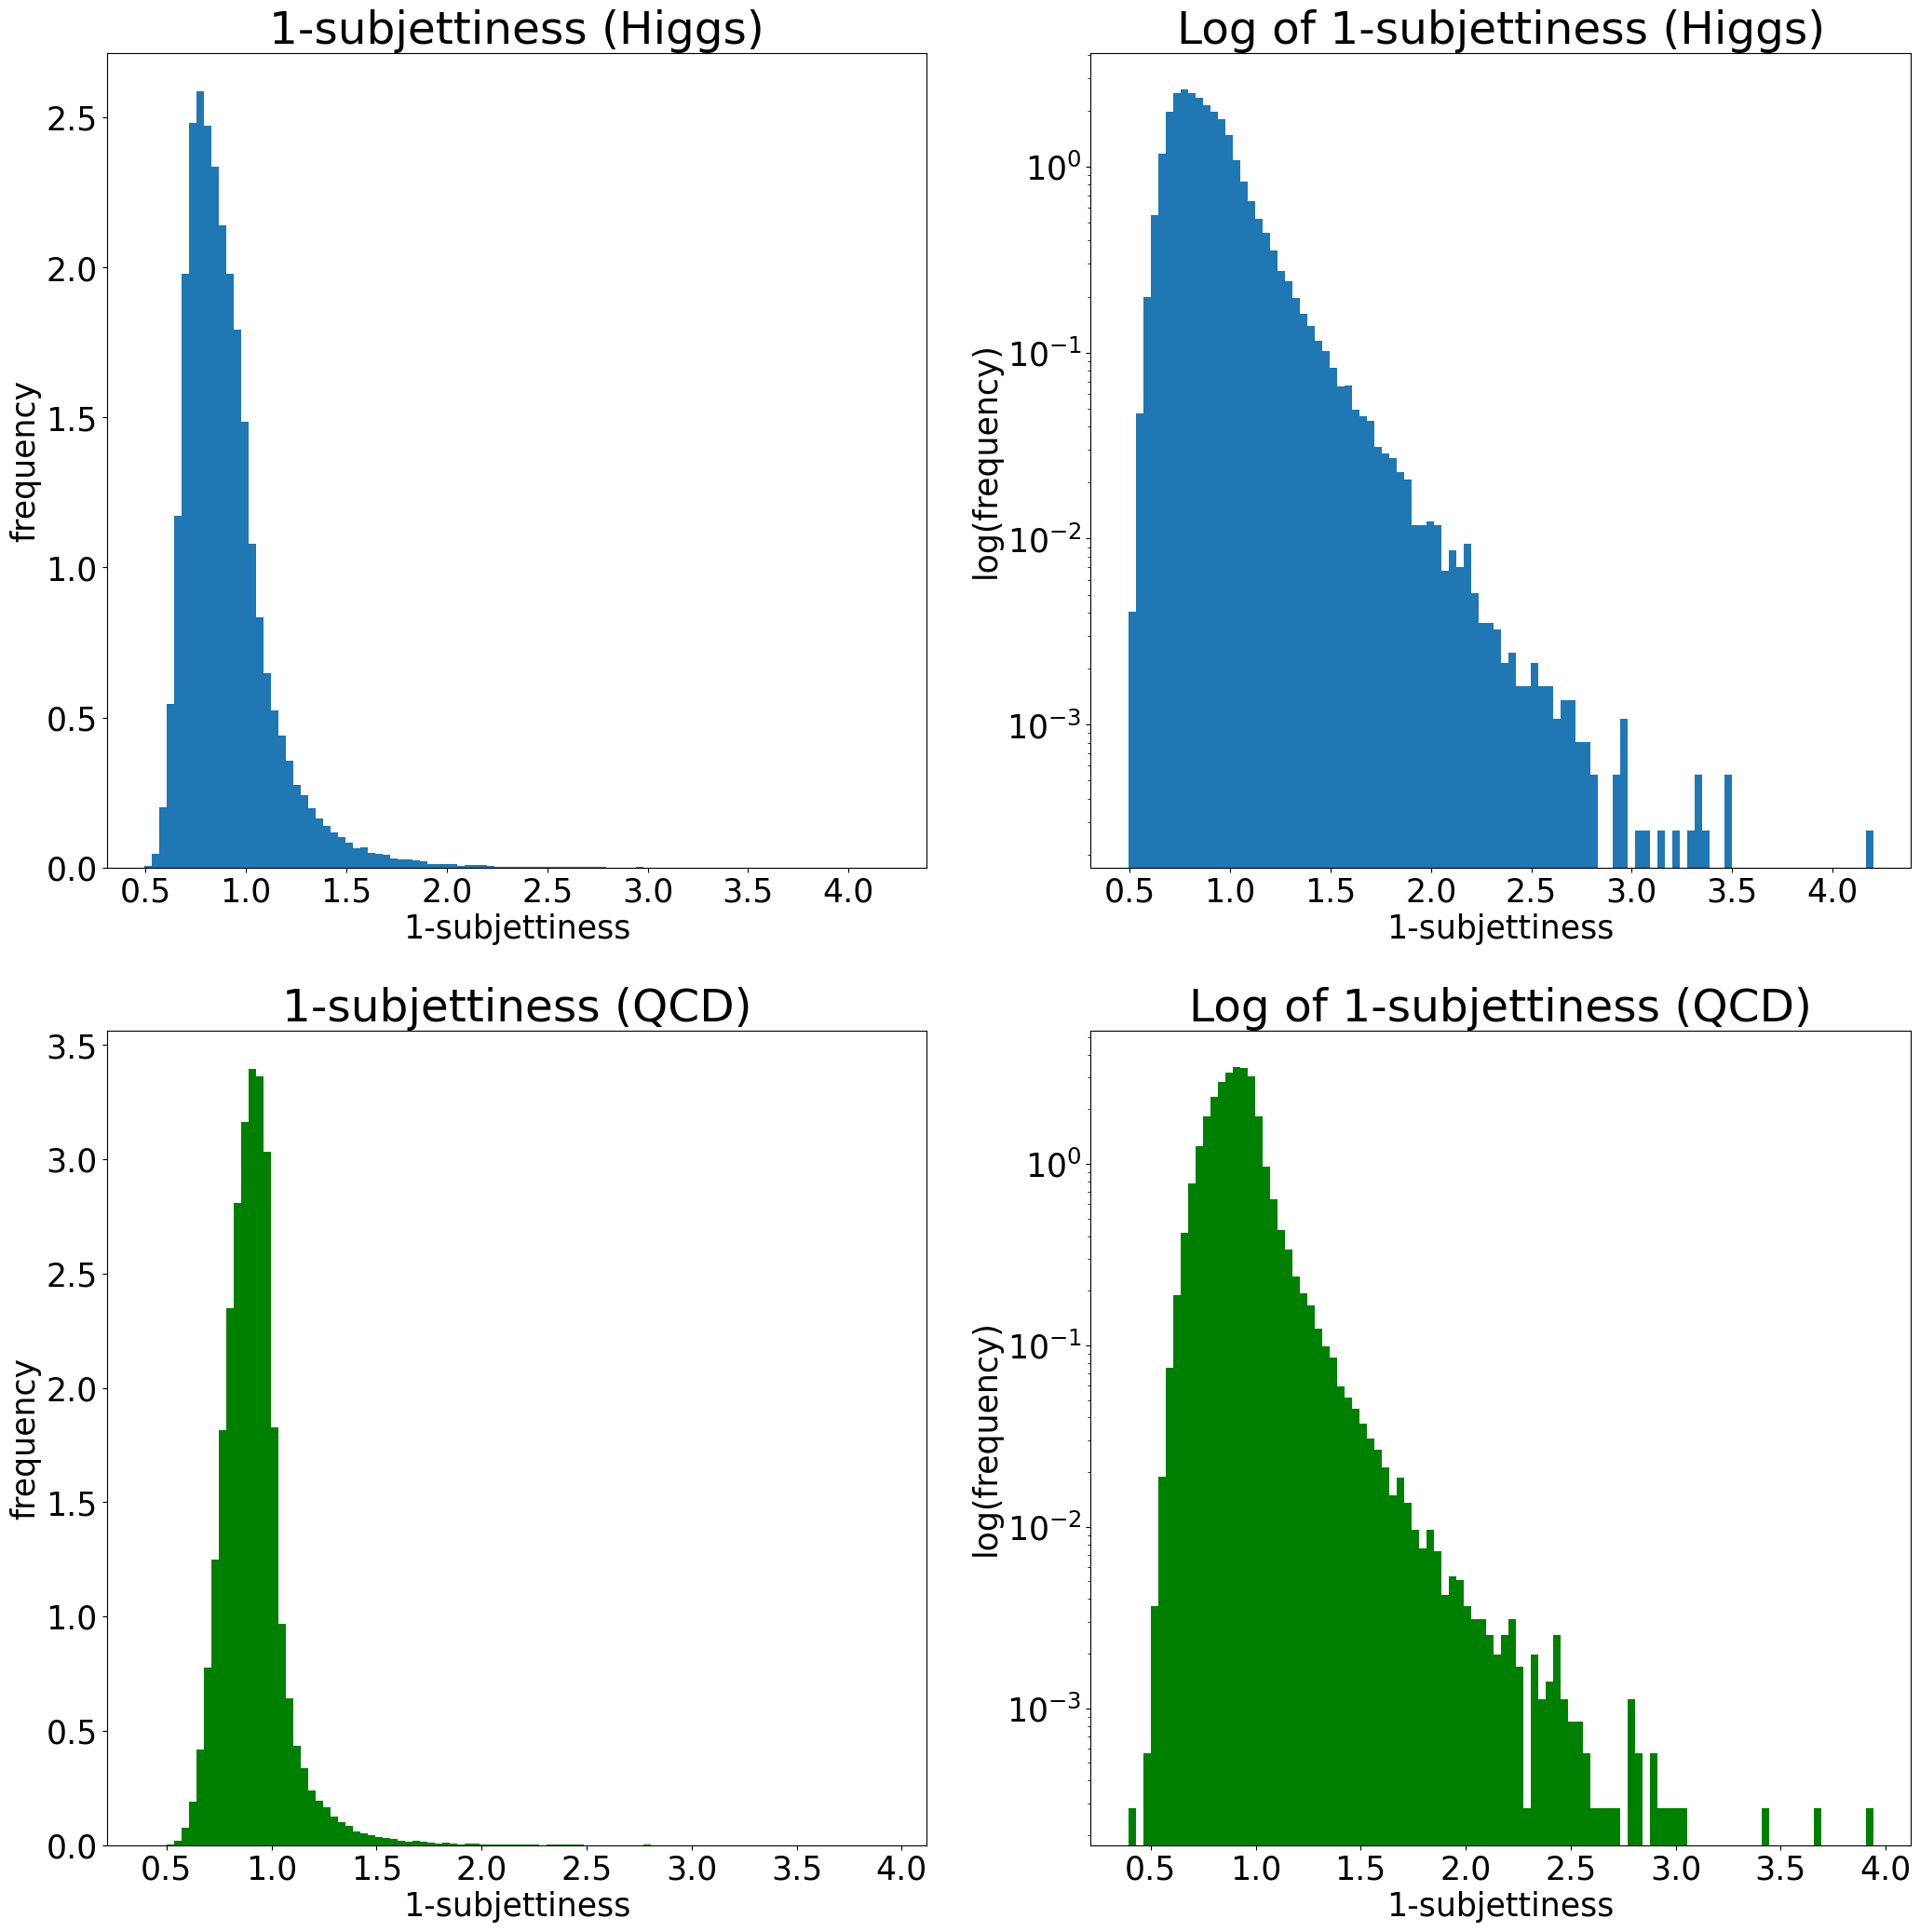

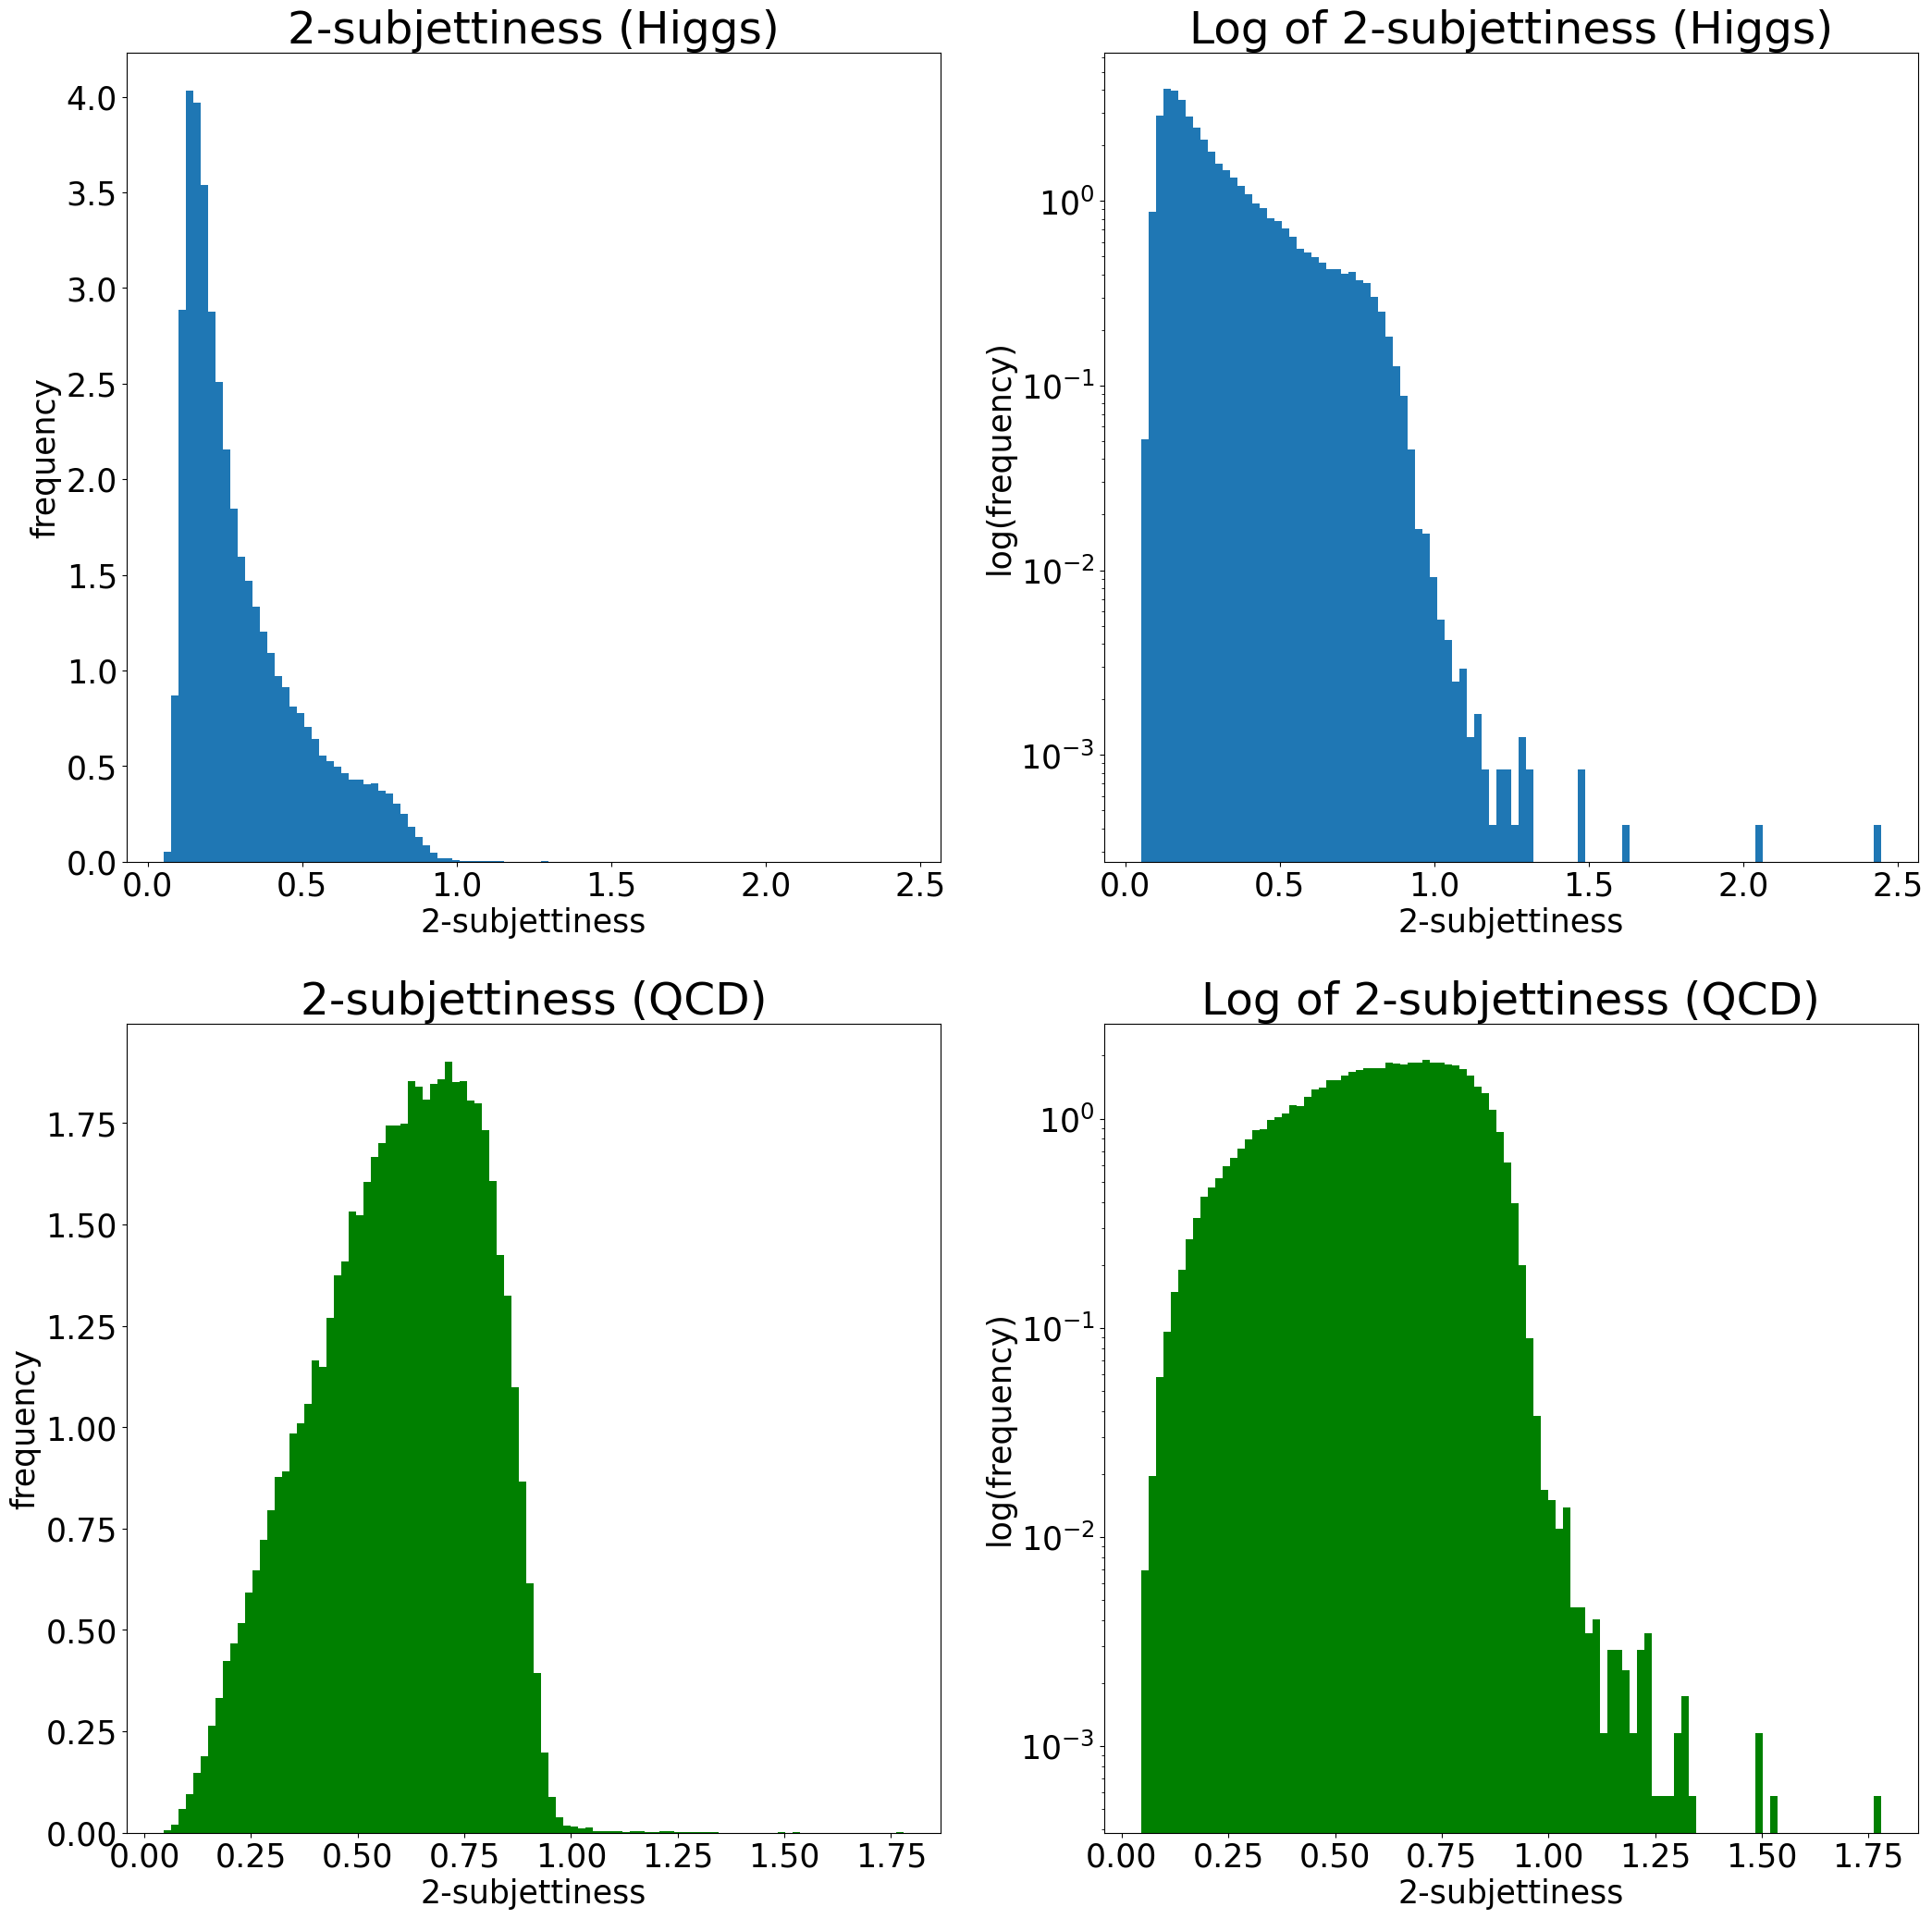

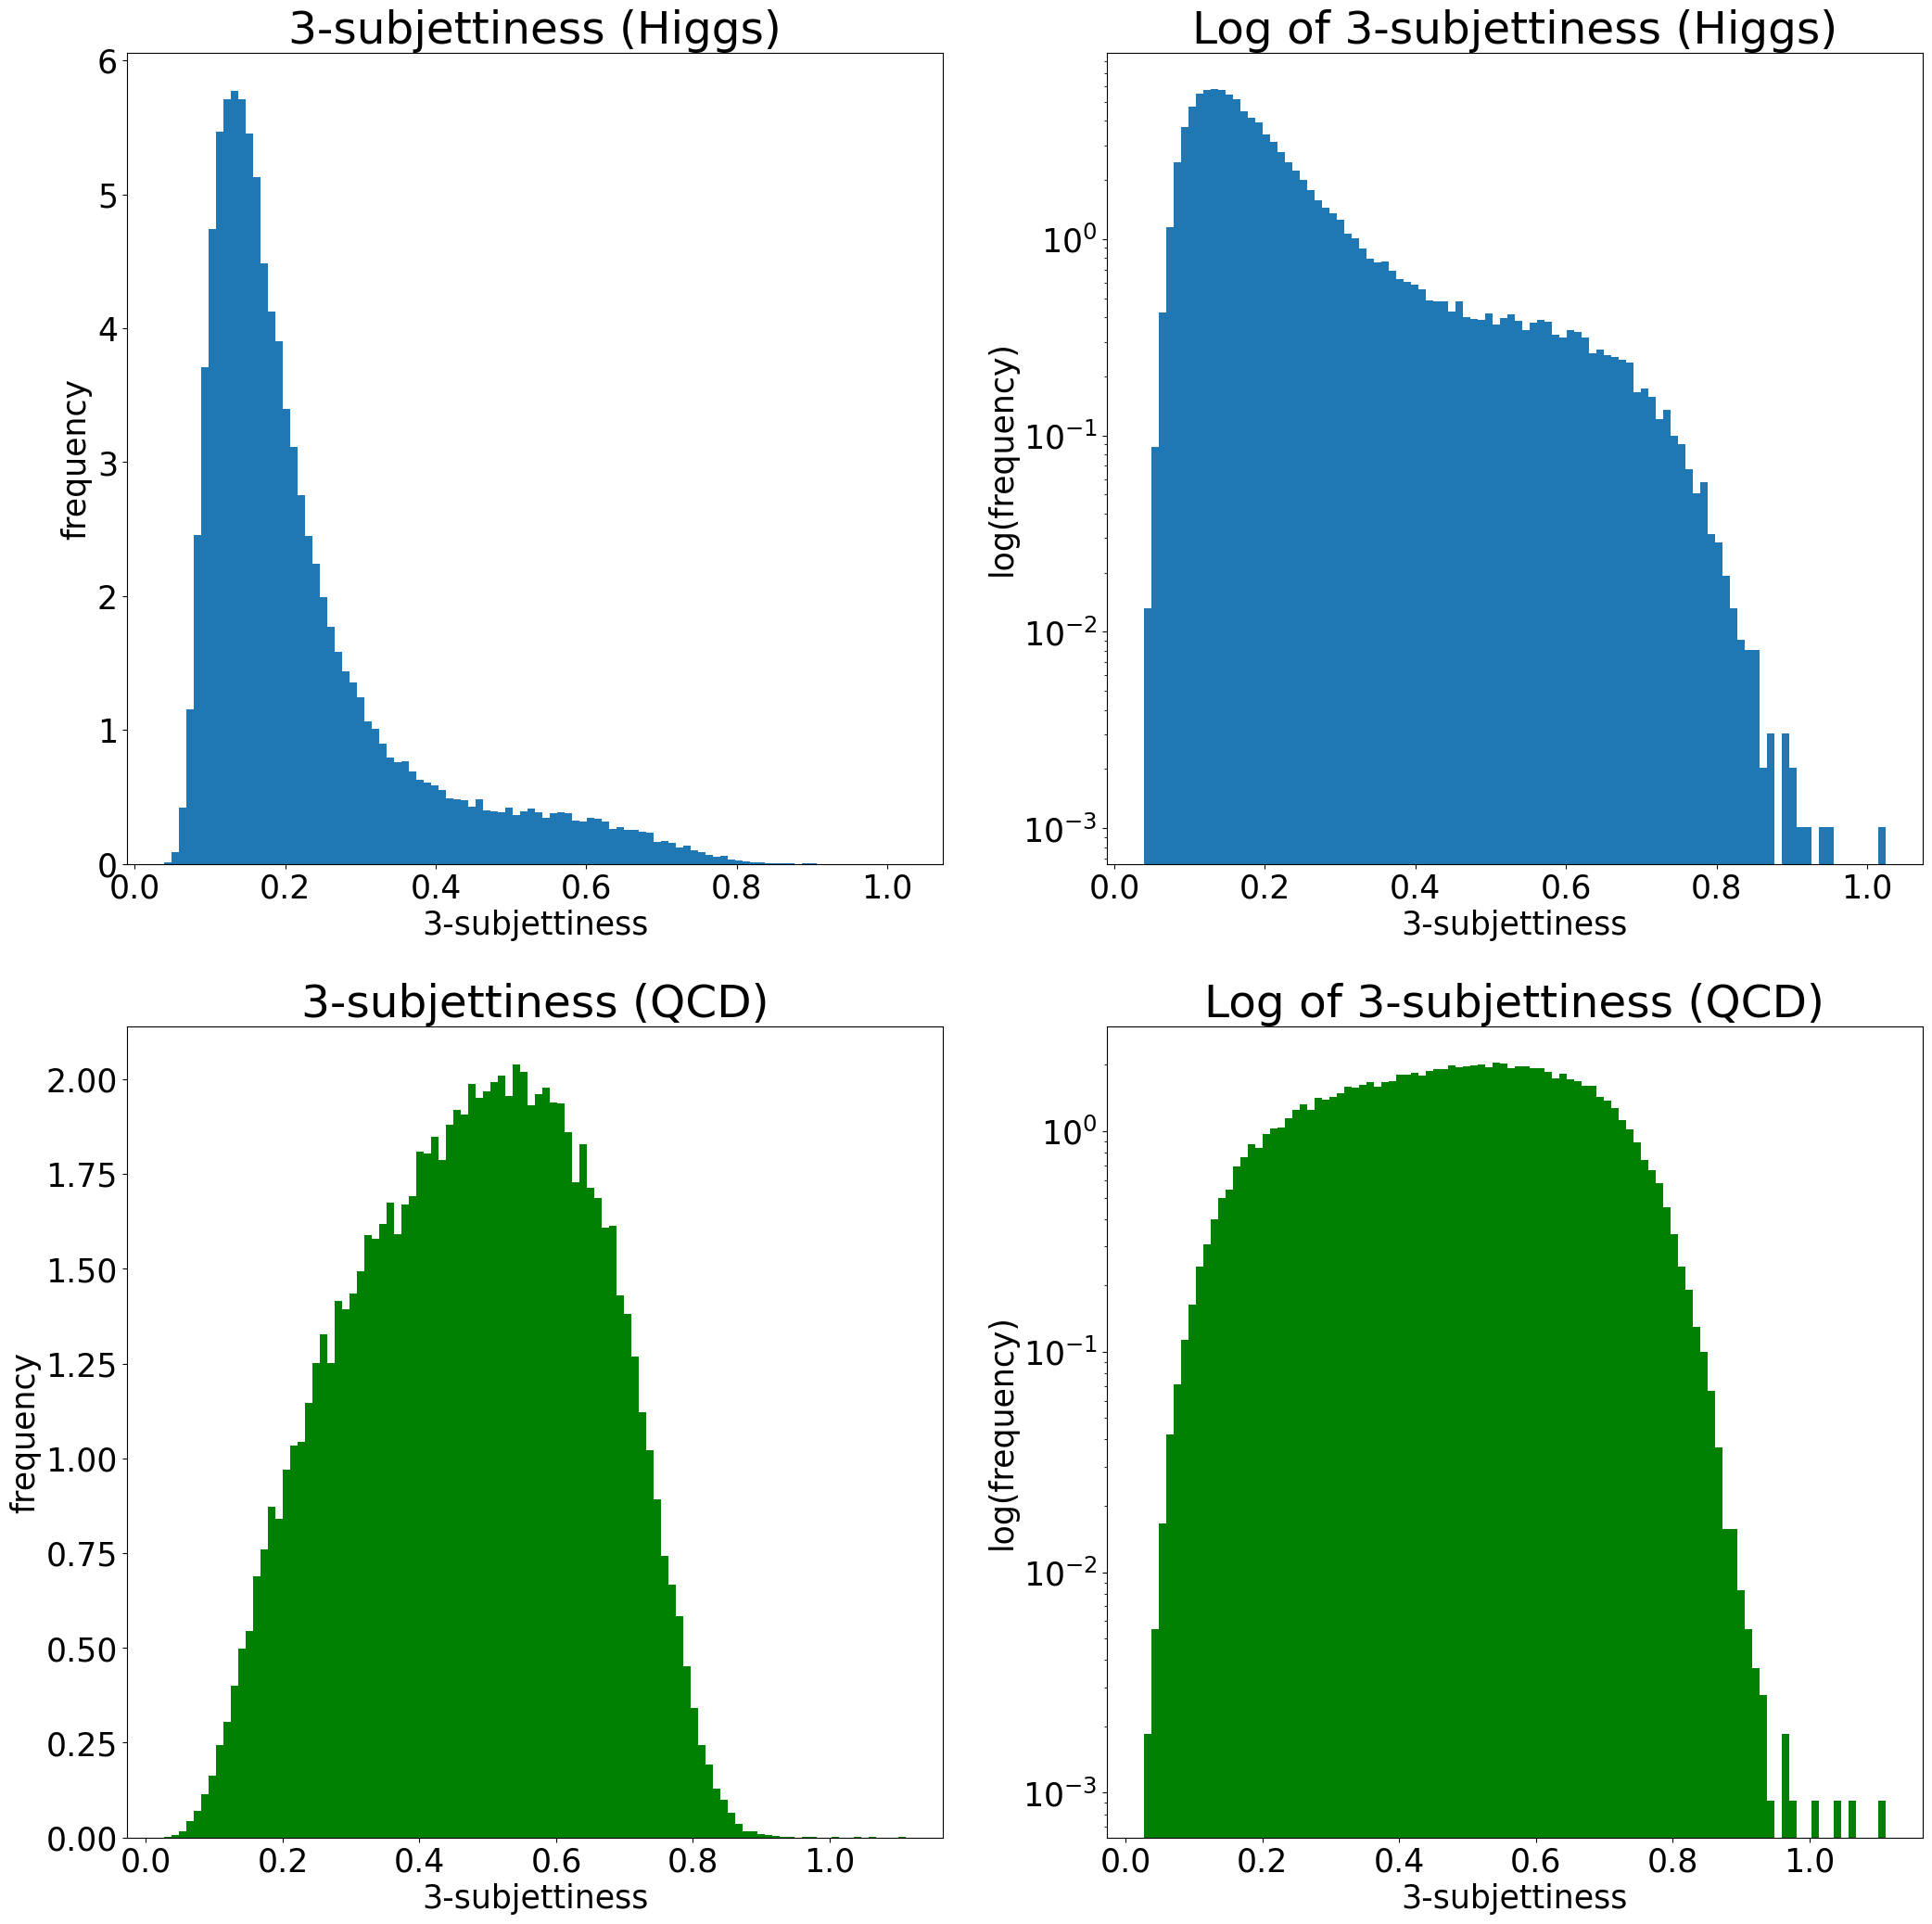

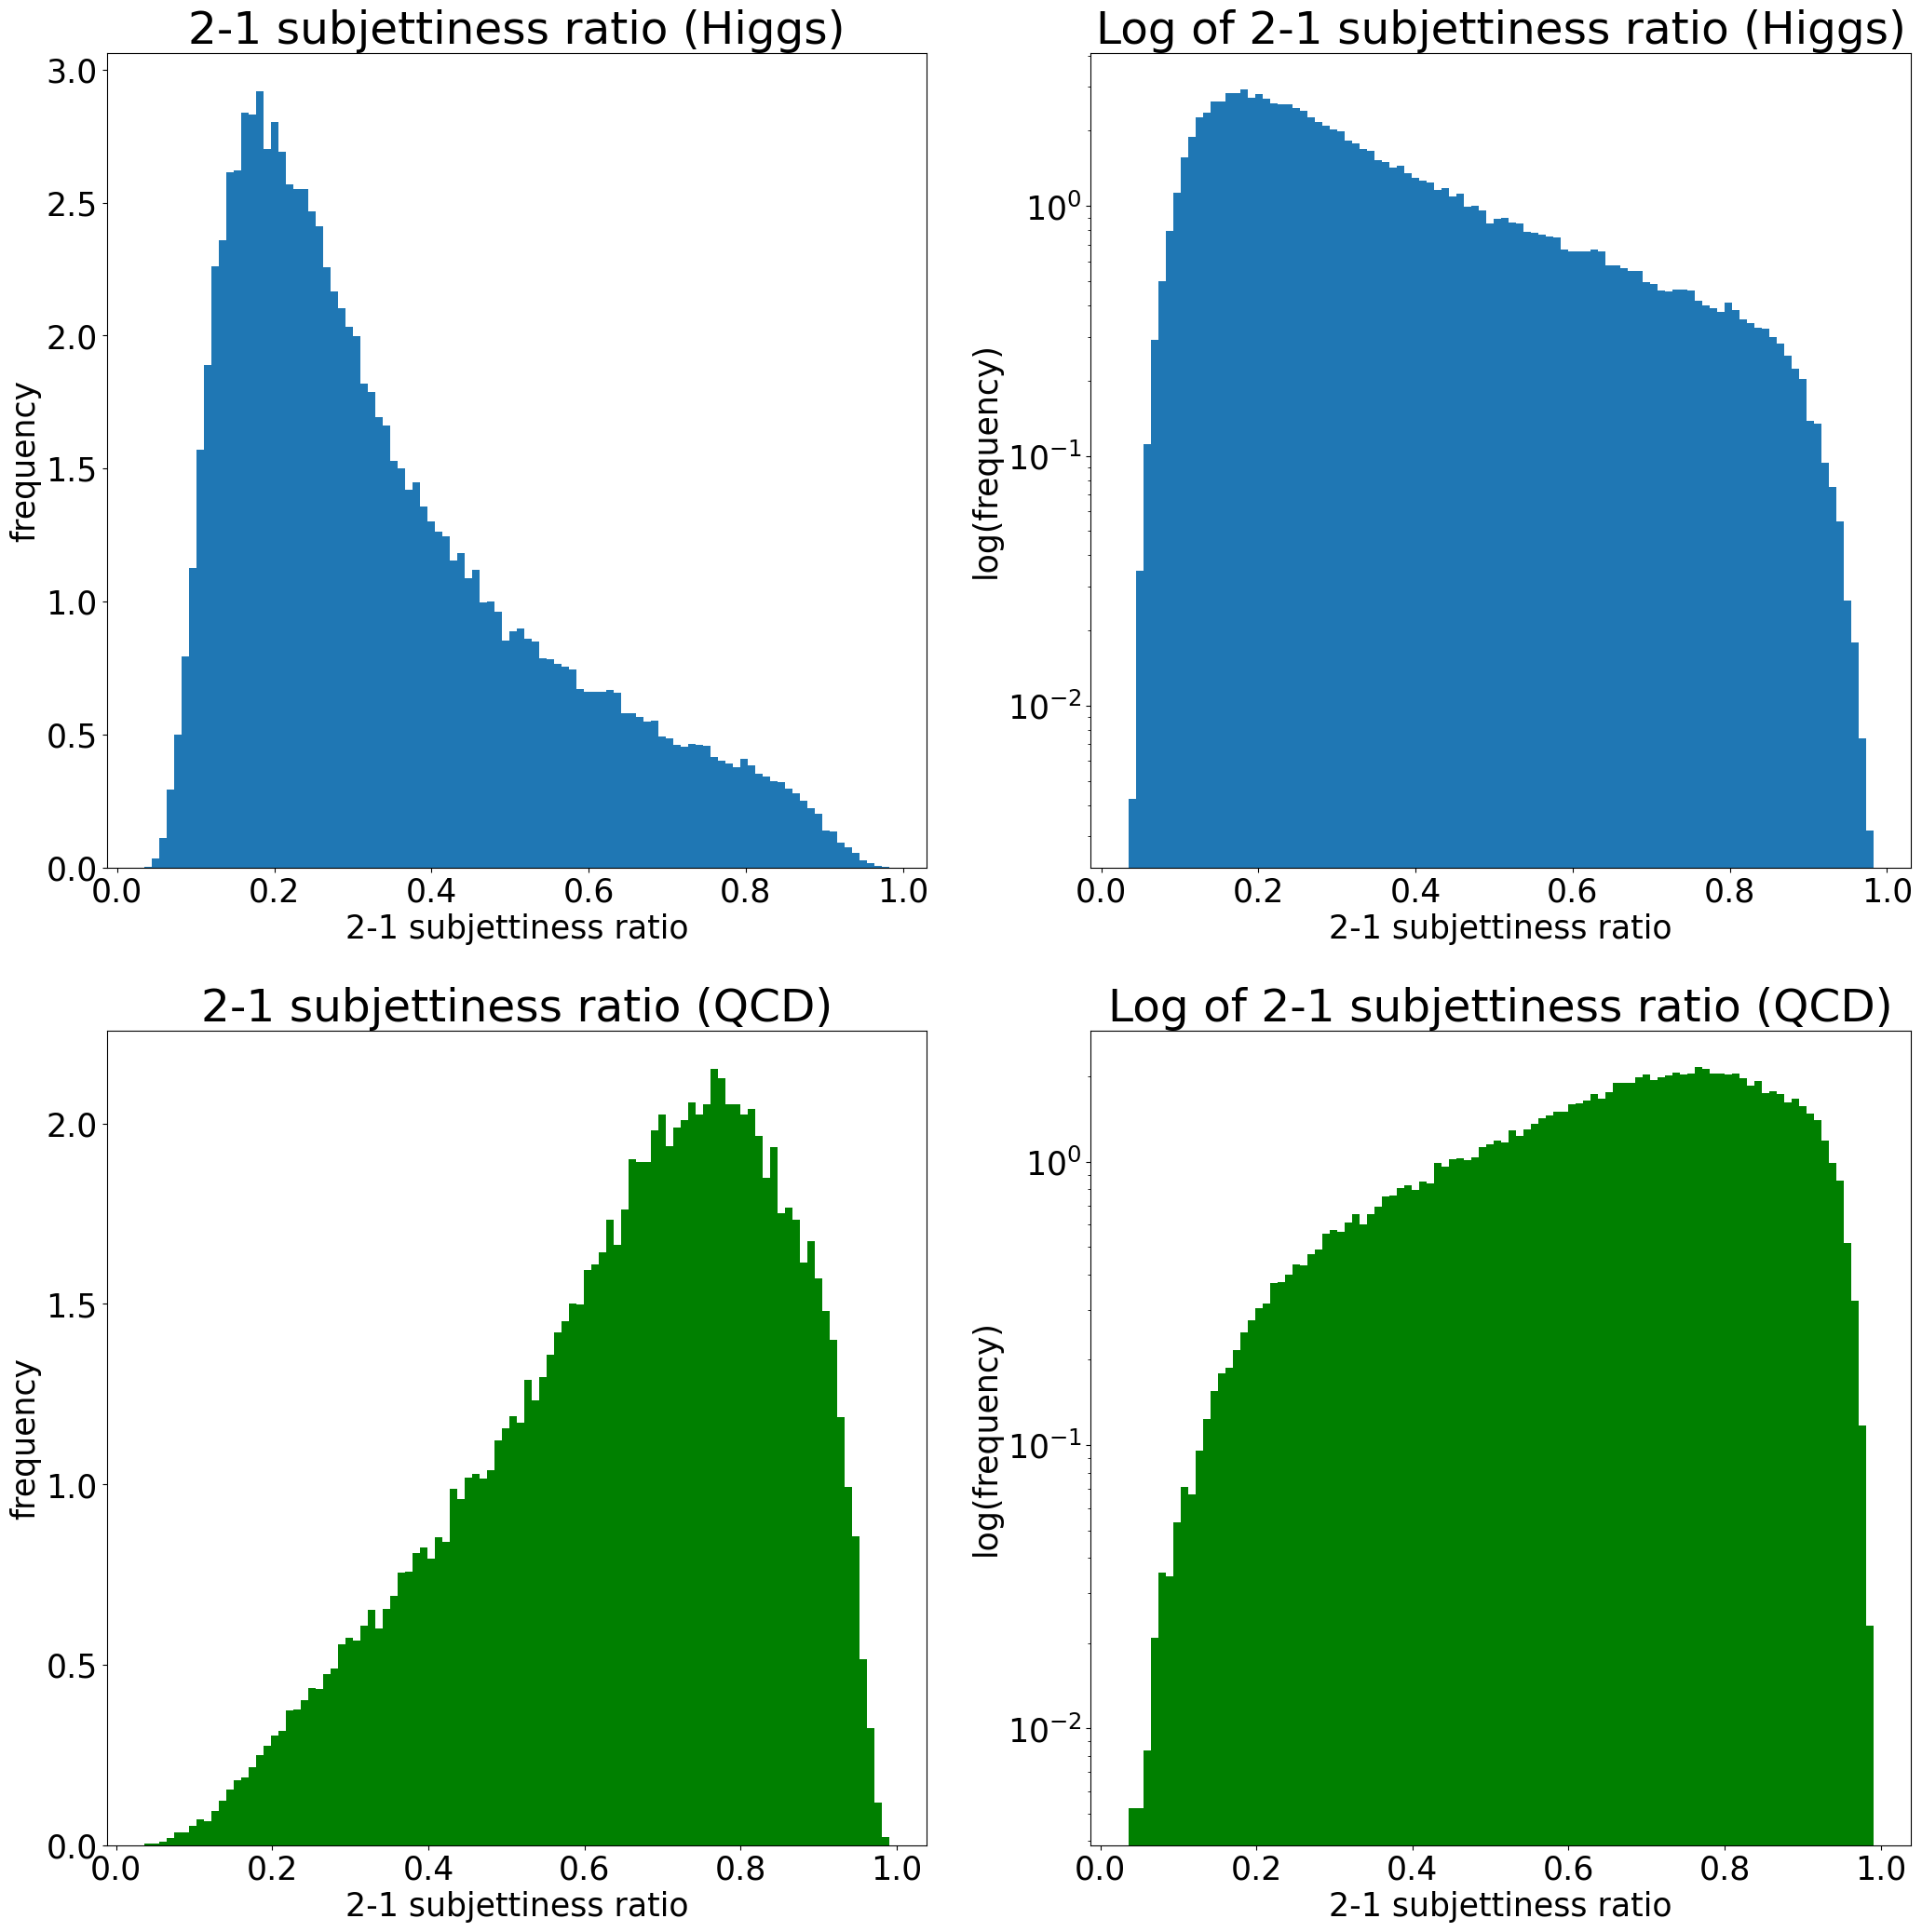

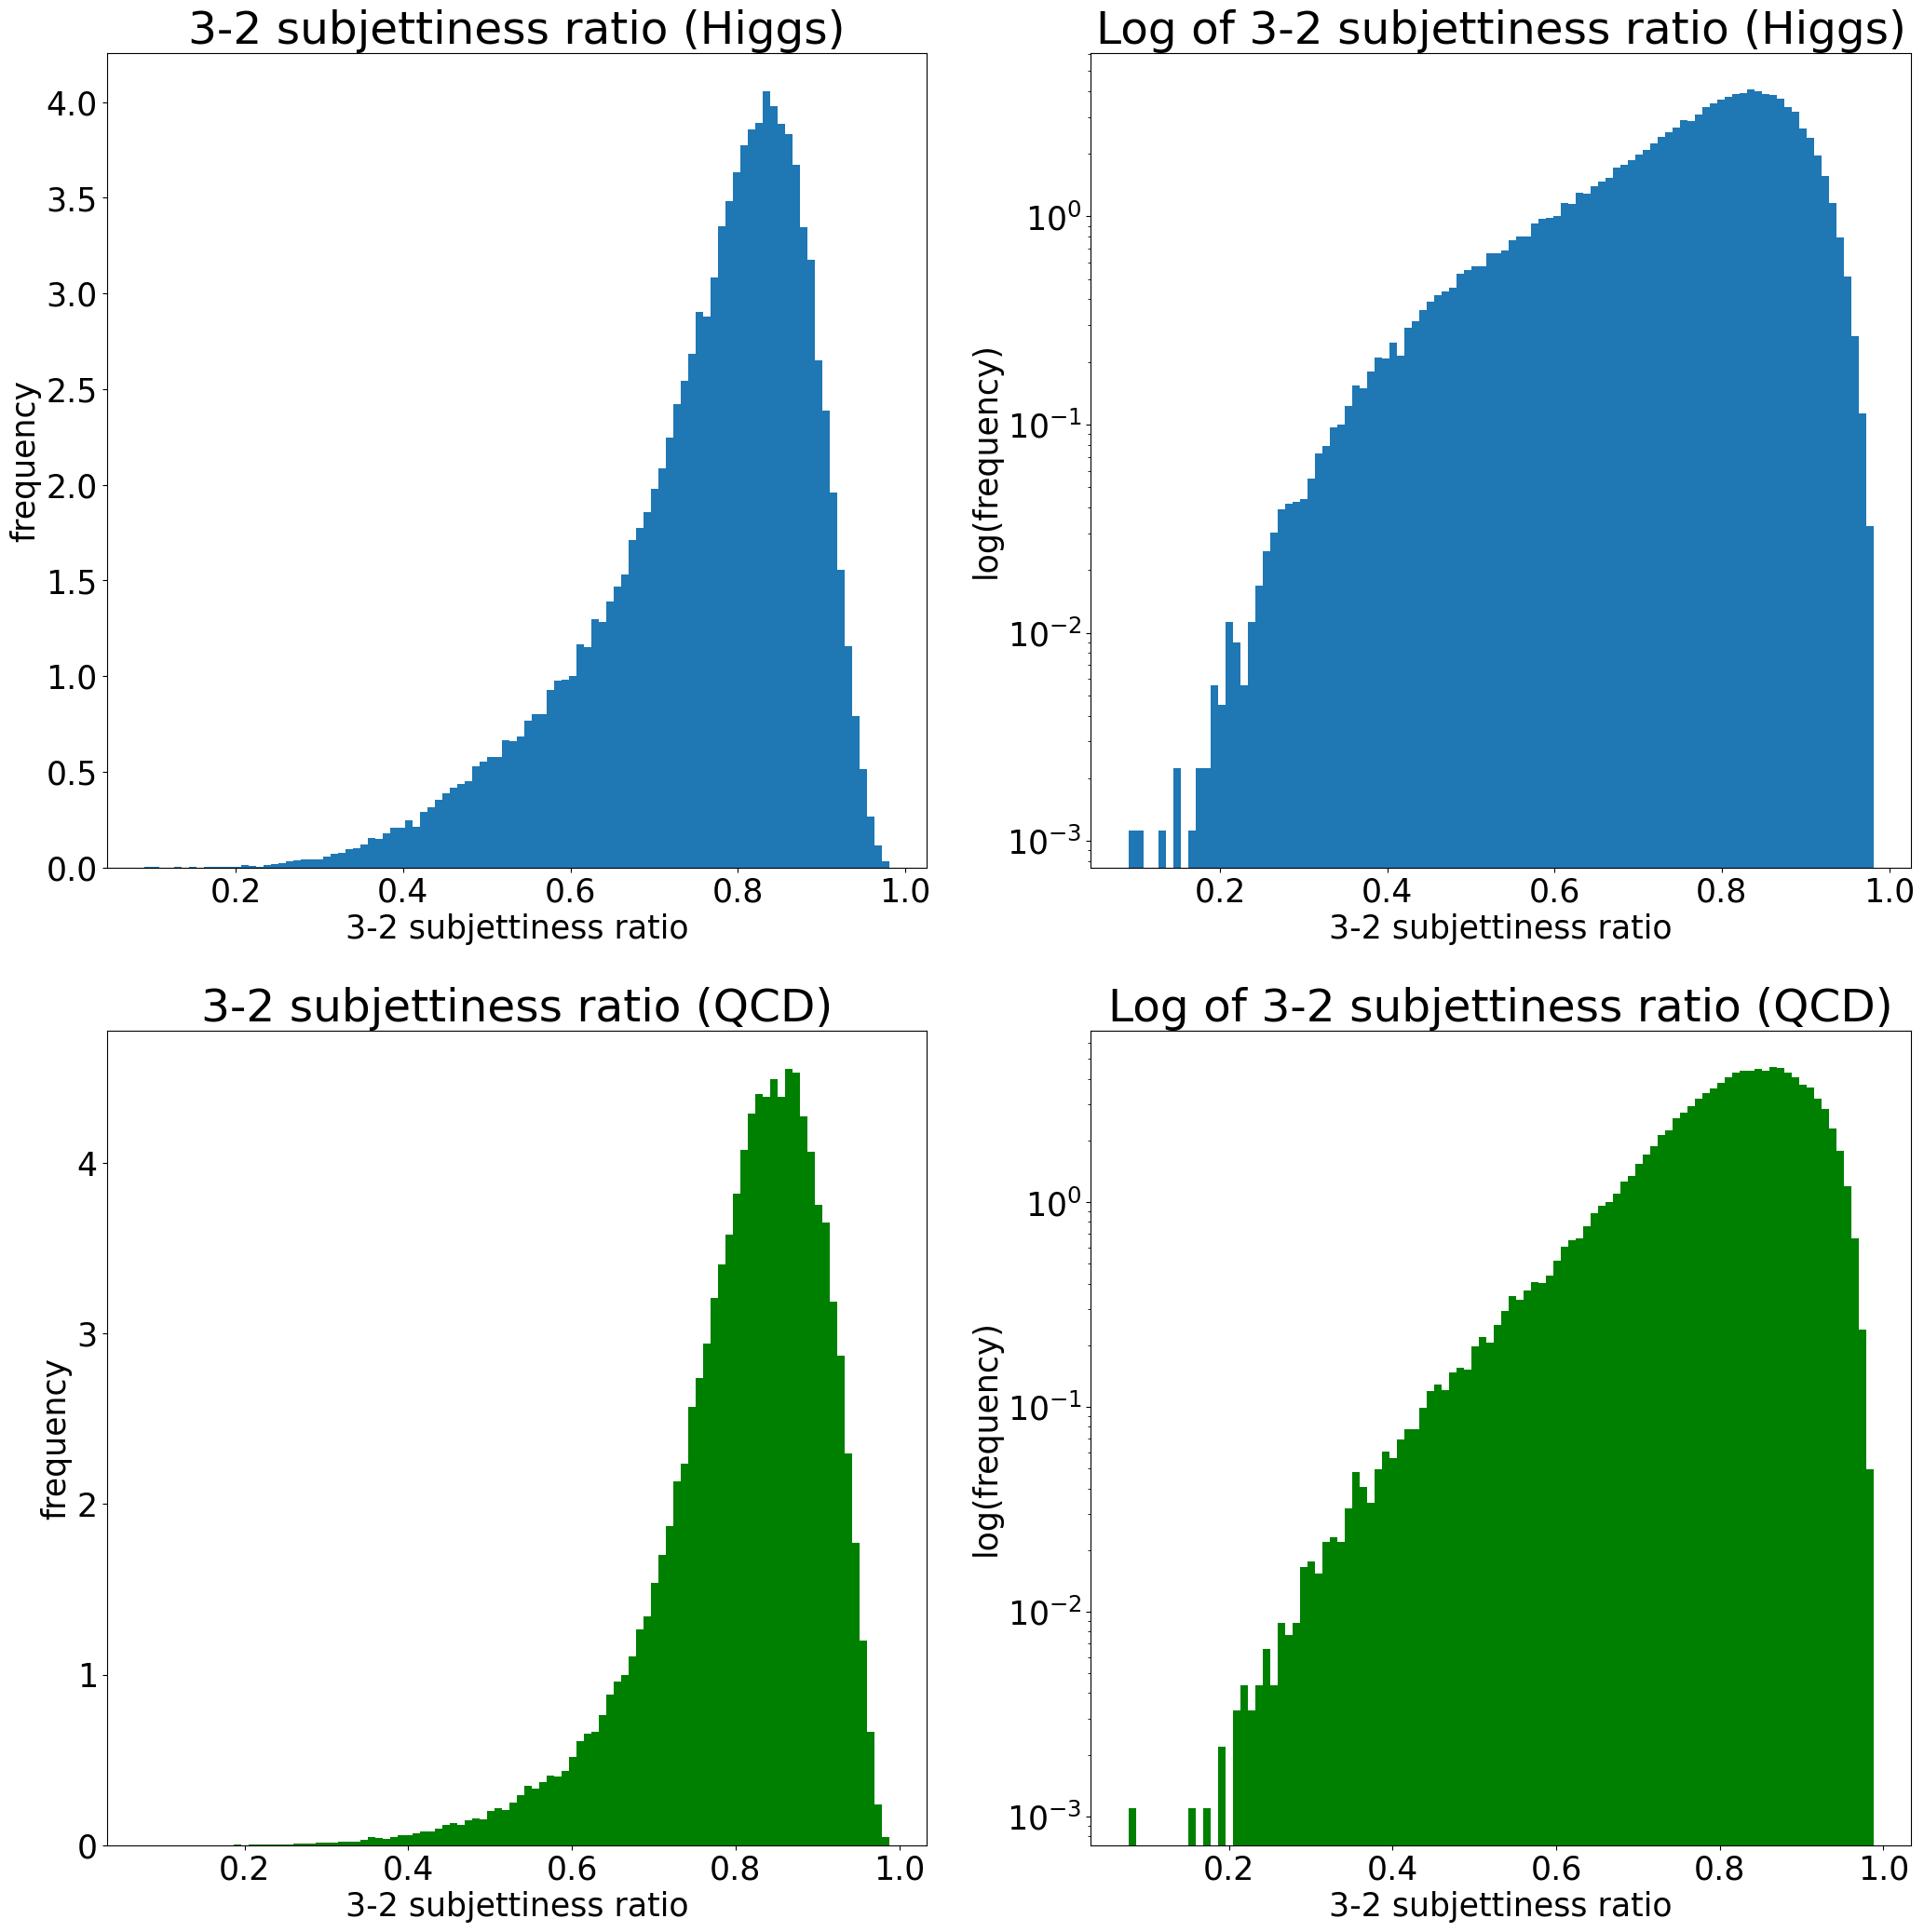

In [12]:
histAndLogHist('t1', '1-subjettiness', '')
histAndLogHist('t2', '2-subjettiness', '')
histAndLogHist('t3', '3-subjettiness', '')
histAndLogHist('t21', '2-1 subjettiness ratio', '')
histAndLogHist('t32', '3-2 subjettiness ratio', '')

##### Analysis of angularity and n-subjettiness features:

Overall unimpressed. Most distributions look very similar in terms of their logarithmic plots.

N = 2, 3 have different shapes, but not too much of a difference.
N = 21 appears to have its data reflected along an axis, which is interesting, but not very discriminatory overall.

### $K_{t}\Delta_R$

$\Delta_R$ can be calculated with the pseudorapidity and azimuth angle, defined as:

$\Delta_R = \sqrt{\eta^2 + \phi^2}$

$K_{t}\Delta_R$ describes the $\Delta_R$ of two subjets within a large-R jet.

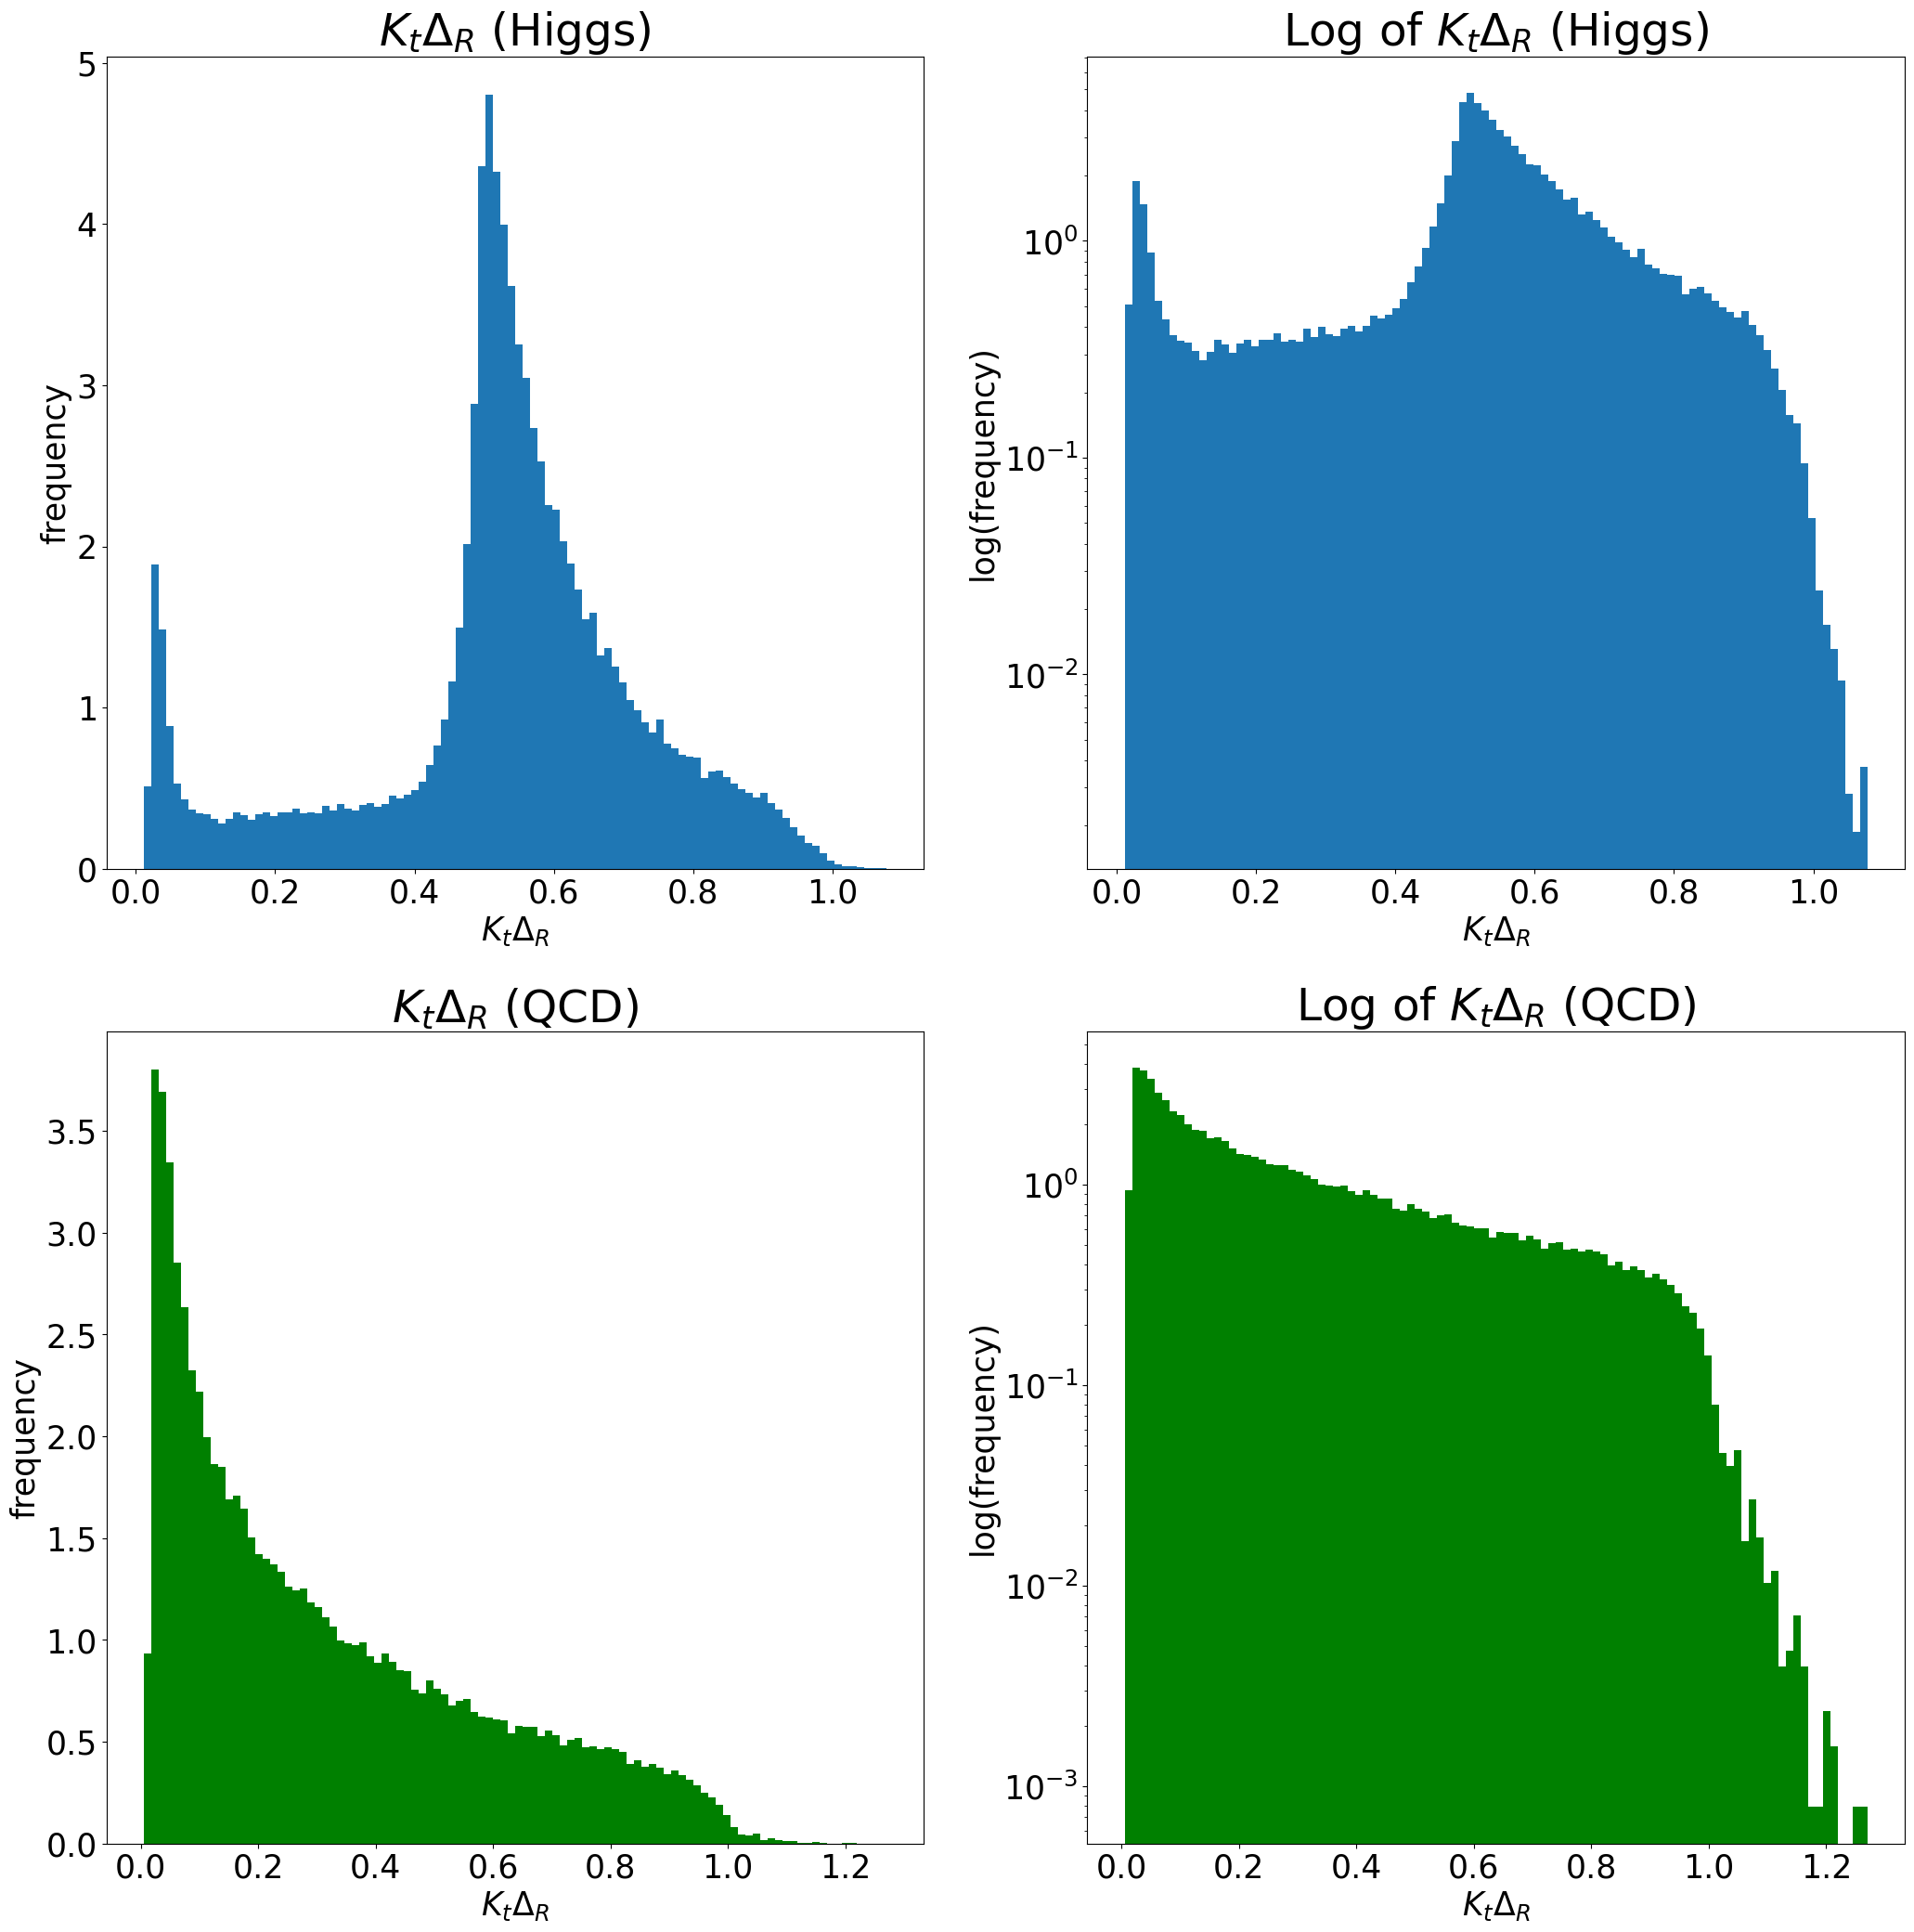

In [13]:
histAndLogHist('KtDeltaR', '$K_{t}\Delta_R$', '')

##### Analysis of $K_{t}\Delta_R$:

The shapes of the distributions in the logarithmic plots certainly differ, and we could potentially use that as leverage to discriminate between signals.

## 1) Do all of the features provide discrimination power between signal and background?

As we have demonstrated above, not all features provide discrimination power between signal and background. And some have much more influence than others. Particularly: transverse momentum, invariant mass, and 2-point and 3-point ECF ratios for reasons explained above.

Some of the glaring examples of little to no discrimination power are: 32-subjettiness and azimuthal angle. If we were to examine the logarithmic histograms, we would have a much harder time trying to see which dataset which graph belonged to.

## 2) Are there correlations among these features?

There are correlations among these features because some features depend on others.

For example, we have $D_2$ (the 3-to-2 point ECF ratio) depend on $e_2$ and $e_3$ (the 2 and 3 point ECF ratios respectively).

Another example is that the invariant mass depends on transverse momentum, because transverse momentum is a component of the overall momentum of the particles, and through energy mass equivalence.

Jets depend on pseudorapidity and azimuth angle depending on the definition of the jets. And this in turn will also affect the $\Delta_R$ definition in the difference of two subjets within a large-R jet.

And finally, $\tau_{21}$ and $\tau_{32}$ depend on the ratios of their respective features.

## 3) Compute the expected discovery sensitivity (significance of the expected signal) by normalizing each sample appropriately.

Here we are going to represent the data as a Poisson distribution, keeping in mind the expected value of Higgs to be 100, and the expected value of qcd data points to be 20000.

In [27]:
probability = poisson.cdf(20100, 20000)
1 - probability

0.2384721219068744

## 4) Develop a plan to optimize the discovery sensitivity by applying selections to these features.

We have two primary steps we can take to optimize discovery sensitivity.

i) We can compare the domains of the Higgs vs. qcd graphs. If there is a significant difference between the two and the qcd data spans a larger range than the Higgs data, we can simply cut off the domain of the data that lies with respect to the Higgs data only.

ii) We can model the curves with different distributions/curves with respect to the Higgs data. We can then trim off any data that exceeds these curves, and focus on the data that appears to fit it.